## 8. Assignment: Heart Disease Classification Challenge

### **Objective**
Apply all four classification methods we've learned to predict heart disease using a real medical dataset. Compare their performance and analyze which method works best for this healthcare application.

### **Dataset Overview**
You'll be working with the **Heart Disease UCI dataset** containing 13 clinical features to predict whether a patient has heart disease:

**Clinical Features:**
- **age**: Patient's age in years

- **sex**: Gender (Male/Female)

- **cp**: Chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)

- **trestbps**: Resting blood pressure (mm Hg)

- **chol**: Serum cholesterol (mg/dl)

- **fbs**: Fasting blood sugar > 120 mg/dl (True/False)

- **restecg**: Resting electrocardiographic results

- **thalch**: Maximum heart rate achieved

- **exang**: Exercise induced angina (True/False)

- **oldpeak**: ST depression induced by exercise relative to rest

- **slope**: Slope of the peak exercise ST segment

- **ca**: Number of major vessels colored by fluoroscopy (0-3)

- **thal**: Thalassemia (normal, fixed defect, reversable defect)

**Target Variable:**
- **num**: Heart disease status (0 = healthy, 1 = has heart disease)

### **Assignment Tasks**
Complete the following tasks in order. Each task builds upon the previous ones:

**1. Data Exploration & Preprocessing**
- Load and examine the dataset structure

- Check for missing values and handle them appropriately

- Perform exploratory data analysis with at least 3 visualizations

- Potentially create new useful features

- Encode categorical variables (sex, cp, restecg, slope, thal)

- Split data into training and testing sets (80/20 split)

**2. Feature Analysis**
- Create correlation matrix heatmap to identify relationships

- Analyze class distribution (healthy vs. heart disease)

- Scale features for algorithms that require it

**3. Model Implementation**
Implement and train all four classification methods:
- **Logistic Regression**

- **Decision Tree**: Tune max_depth and min_samples_split

- **Random Forest**: Tune n_estimators and max_depth

- **Support Vector Machine**: Try both linear and RBF kernels, tune C

**4. Model Evaluation**
For each model, calculate and compare:
- Accuracy

- Confusion matrices

- Summarize results in a comparison table

### **Tips for Success**

**Data Preprocessing Tips:**
- Use `pd.get_dummies()` for categorical encoding

- Check for outliers in continuous variables

- Consider using `StandardScaler` for Logistic Regression and SVM

**Model Training Tips:**
- Start with default parameters, then tune systematically

- Use `train_test_split(stratify=y)` to maintain class balance

- Set `random_state=42` for reproducible results


# **1. Data Exploration & Preprocessing**
- Load and examine the dataset structure

- Check for missing values and handle them appropriately

- Perform exploratory data analysis with at least 3 visualizations

- Potentially create new useful features

- Encode categorical variables (sex, cp, restecg, slope, thal)

- Split data into training and testing sets (80/20 split)


## Load the Heart Diseaase dataset and examine its structure


In [85]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import kagglehub
import os
import seaborn as sns
sns.set()


print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sklearn.__version__)


numpy: 2.0.2
pandas: 2.2.2
sklearn: 1.6.1


In [86]:
# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
dataset_path = "/".join((path, "heart_disease_uci.csv"))

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Path to dataset files: /kaggle/input/heart-disease-data


In [87]:
df = pd.read_csv(dataset_path)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    1  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [88]:
df

id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  3.0   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
0         fixed defect    0  
1               normal    1  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915                NaN    1  
916                NaN    0  
917       fixed defect    1  
918                NaN    0  
919                NaN    1  

[920 rows x 16 columns]

In [89]:
print("Column Information:")
print(df.info())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


- Check for numeric columns

In [90]:
df.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.553261  
std      0.935653    0.497426  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    1.000000  
max      3.000000    1.000000

- Check for categorical columns

In [91]:
df.describe(include='object')

sex    dataset            cp    fbs restecg  exang slope    thal
count    920        920           920    830     918    865   611     434
unique     2          4             4      2       3      2     3       3
top     Male  Cleveland  asymptomatic  False  normal  False  flat  normal
freq     726        304           496    692     551    528   345     196

## Visualize the distribution of our features and target

- Distribution of numeric features

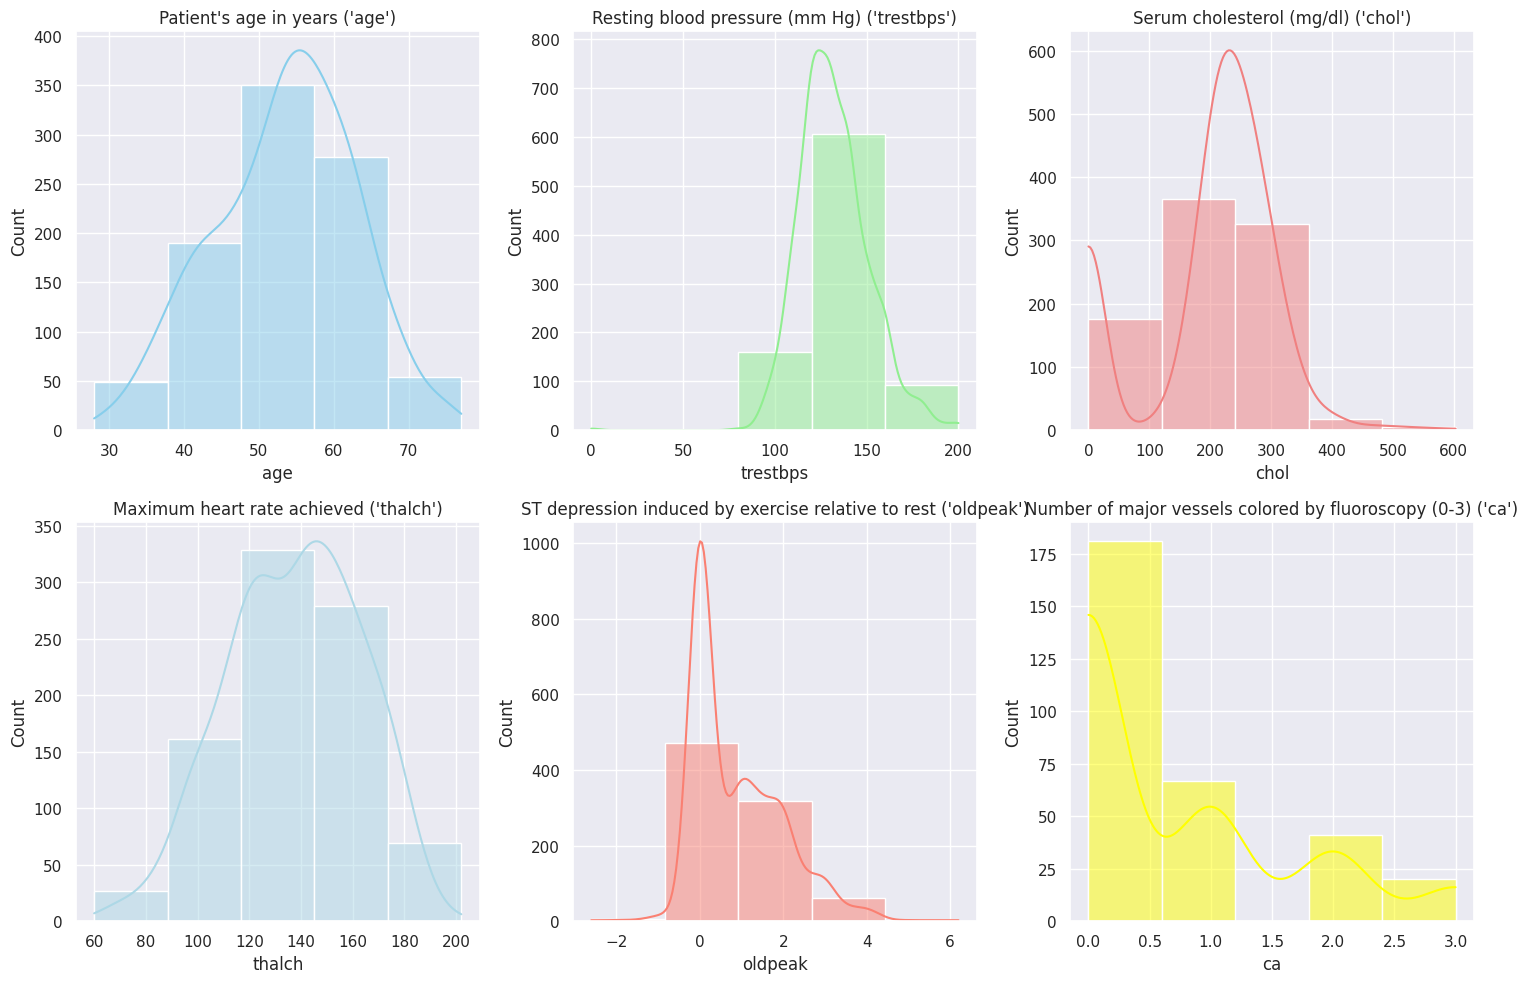

In [92]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df['age'], bins=5, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Patient's age in years ('age')")

sns.histplot(df['trestbps'], bins=5, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Resting blood pressure (mm Hg) ('trestbps')")

sns.histplot(df['chol'], bins=5, kde=True, ax=axes[0, 2], color='lightcoral')
axes[0, 2].set_title("Serum cholesterol (mg/dl) ('chol')")

sns.histplot(df['thalch'], bins=5, kde=True, ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title("Maximum heart rate achieved ('thalch')")

sns.histplot(df['oldpeak'], bins=5, kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("ST depression induced by exercise relative to rest ('oldpeak')")

sns.histplot(df['ca'], bins=5, kde=True, ax=axes[1, 2], color='yellow')
axes[1, 2].set_title("Number of major vessels colored by fluoroscopy (0-3) ('ca')")

plt.tight_layout()
plt.show()

- Distribution of target 'num'

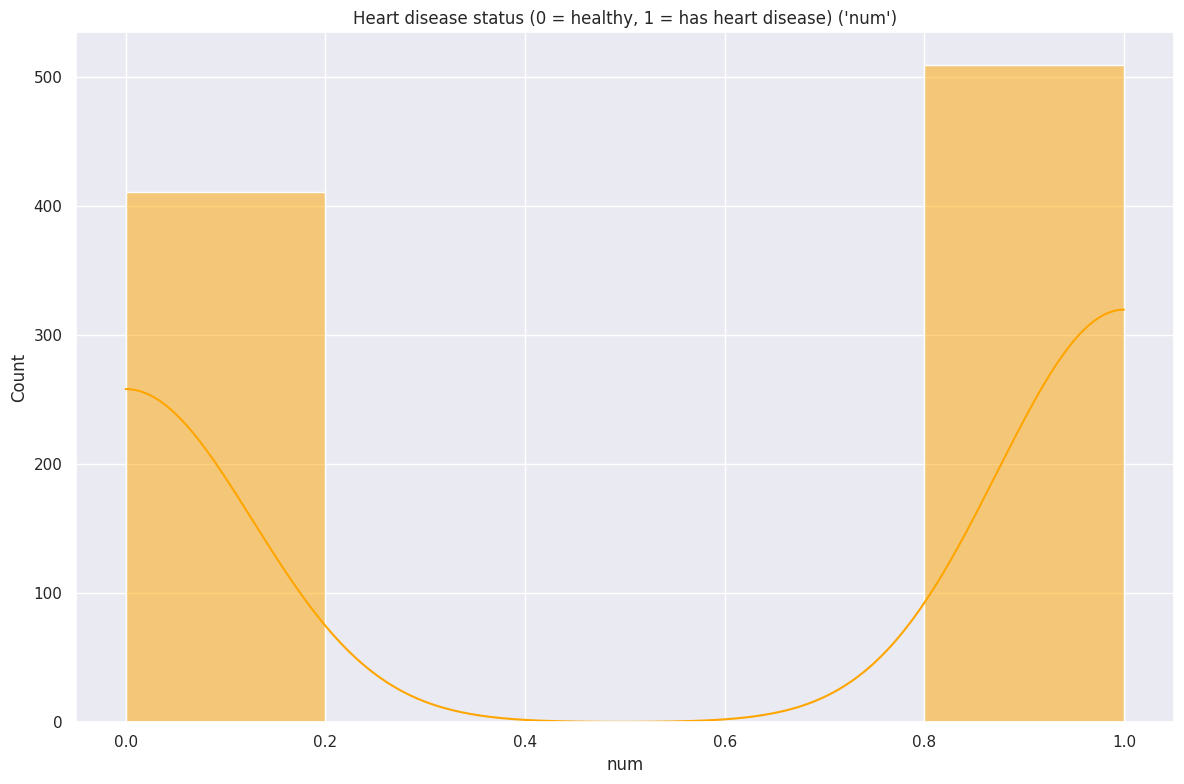

In [93]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(df['num'], bins=5, kde=True, color='orange', ax=ax)
ax.set_title("Heart disease status (0 = healthy, 1 = has heart disease) ('num')")

plt.tight_layout()
plt.show()

We see that the target distribution is balanced, so we do not have to create any synthetic samples.

- Distribution of categorical features

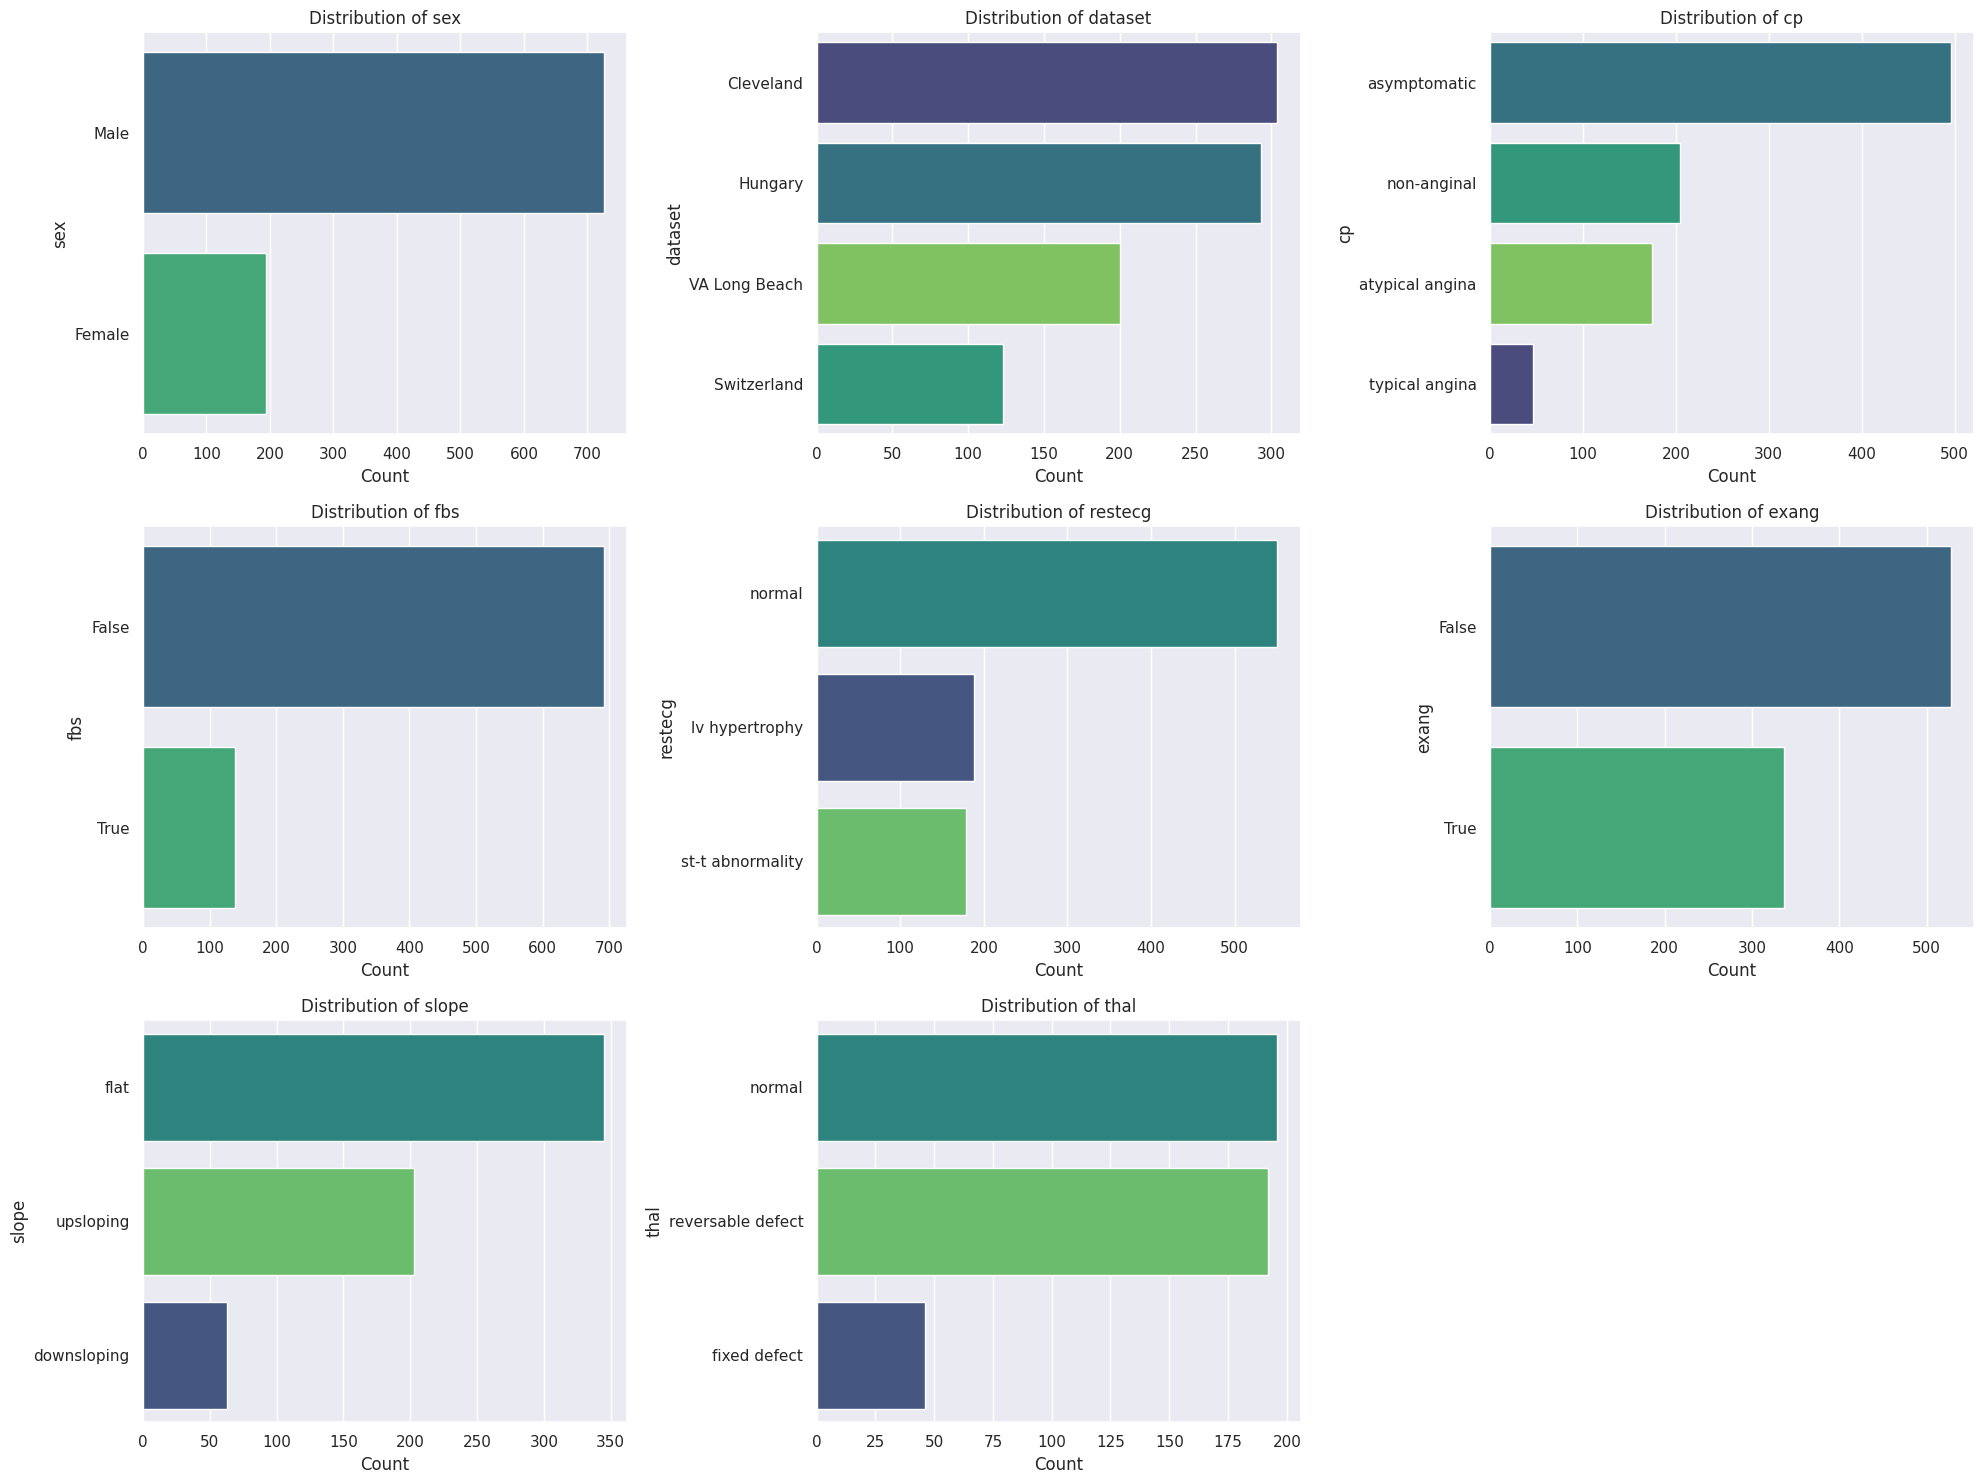

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Determine the grid size
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Plot bar plots for categorical columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, ax=axes[i], order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Visualize the correlations between original features and target

- Create correlation matrix heatmap to identify relationships between the numeric features and the target 'num'

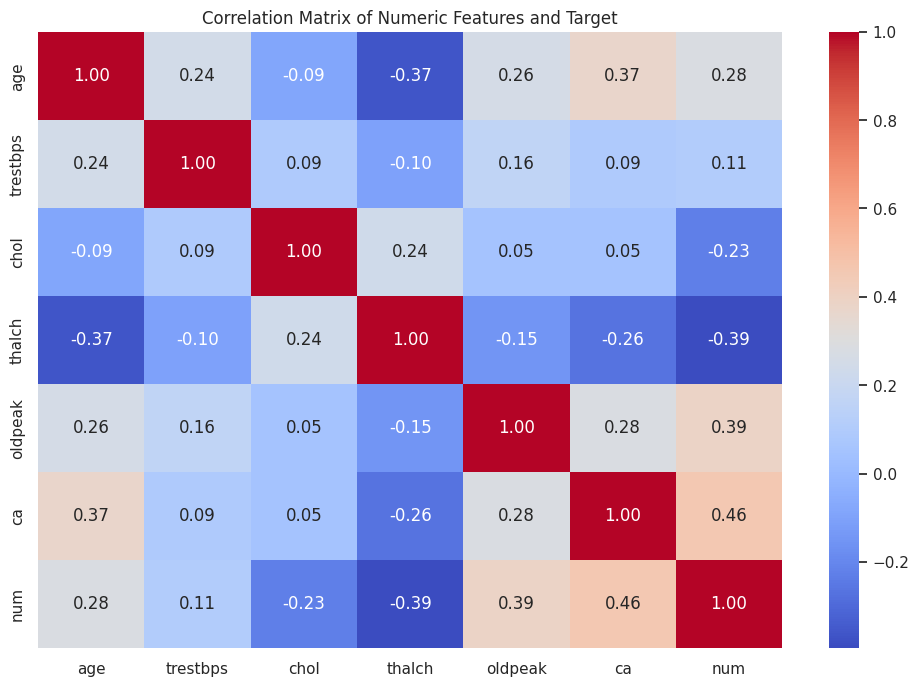

In [95]:
# Select numeric columns including the target, excluding 'id'
numeric_cols_with_target = df.select_dtypes(include=np.number).columns.tolist()
if 'id' in numeric_cols_with_target:
    numeric_cols_with_target.remove('id')

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols_with_target].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features and Target')
plt.show()

From the heatmap we can see that:

The features 'thalch' and 'chol' have a negative correlation with the target
The other features have a positive correlation with the target, 'oldpeak' and 'ca' having the highest correlation coefficients

Visualize the relationship between categorical features and the target

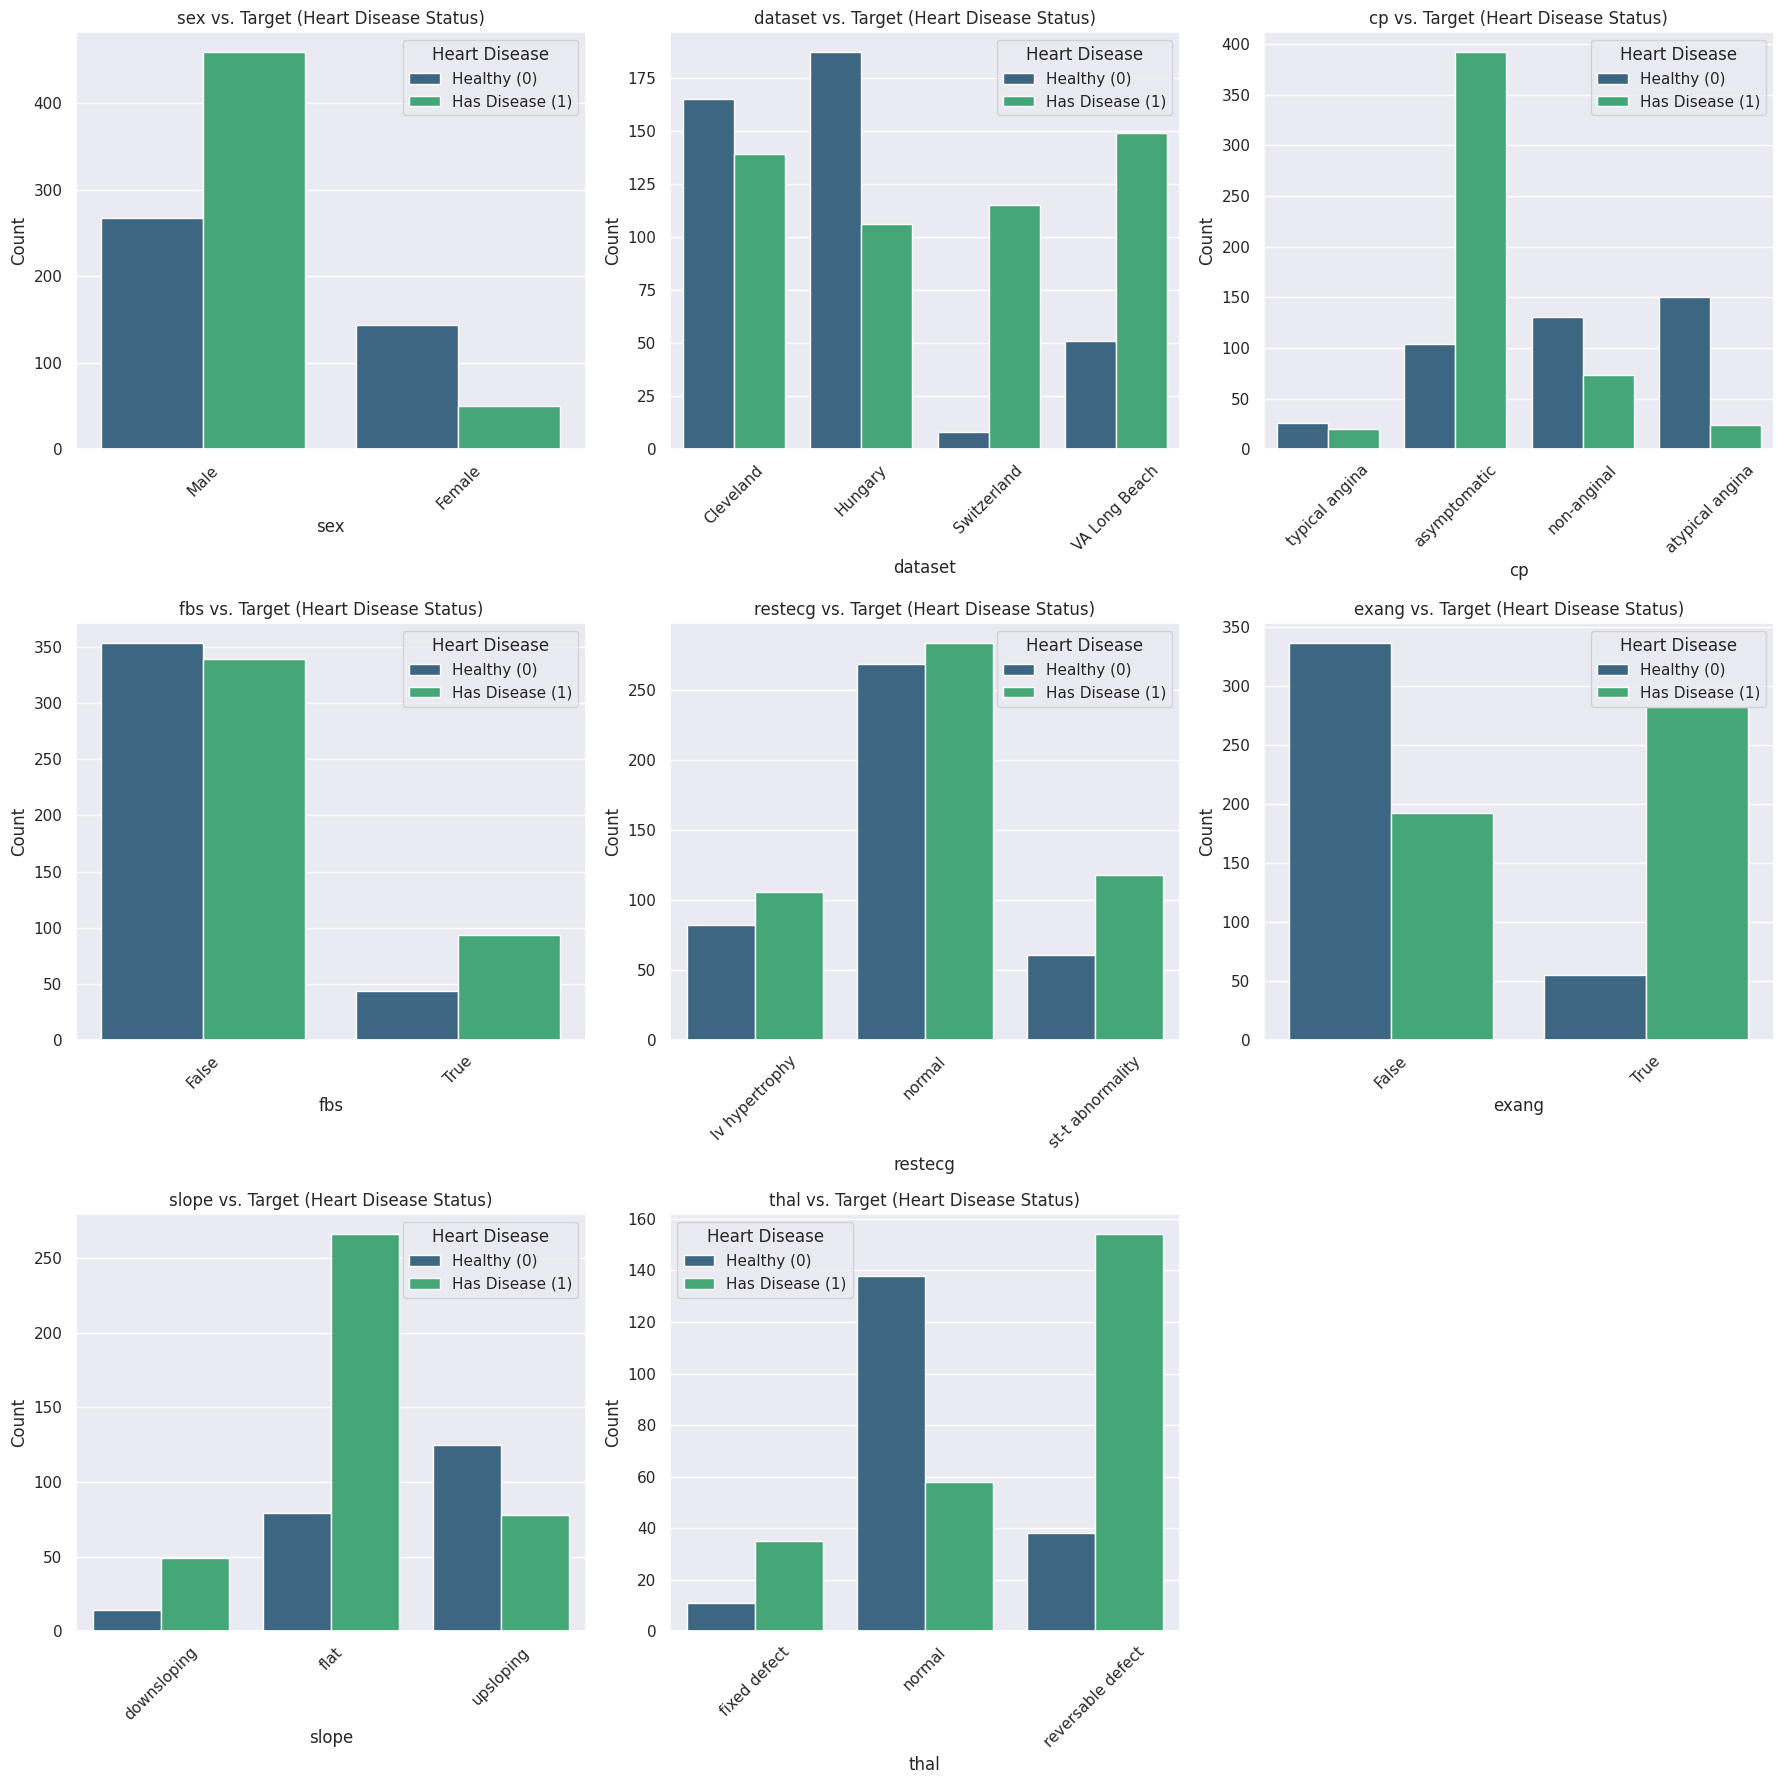

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical and boolean columns
categorical_and_bool_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
# Remove the target variable if it's included in the selection
if 'num' in categorical_and_bool_cols:
    categorical_and_bool_cols.remove('num')


# Determine the grid size for categorical plots
n_cols_cat = 3
n_rows_cat = (len(categorical_and_bool_cols) + n_cols_cat - 1) // n_cols_cat

# Create subplots for categorical features vs. target
fig, axes = plt.subplots(nrows=n_rows_cat, ncols=n_cols_cat, figsize=(18, 6 * n_rows_cat))
axes = axes.flatten()

for i, col in enumerate(categorical_and_bool_cols):
    sns.countplot(data=df, x=col, hue='num', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs. Target (Heart Disease Status)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Heart Disease', labels=['Healthy (0)', 'Has Disease (1)'])


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

Based on the plots of the categorical variables against the target ('num') we can see that:

- *sex*: It appears that a higher proportion of Males have heart disease compared to Females in this dataset.
- *dataset*: The distribution of heart disease status varies across the different datasets. 'Cleveland' and 'VA Long Beach' seem to have a higher count of patients with heart disease compared to 'Hungary' and 'Switzerland'.
- *cp* (Chest Pain Type): The count plot suggests that patients with 'asymptomatic' chest pain have a significantly higher count of heart disease compared to other chest pain types. 'non-anginal' and 'atypical angina' also show a notable number of heart disease cases, while 'typical angina' has the lowest count of heart disease.
- *restecg* (Resting Electrocardiographic Results): Patients with 'normal' resting electrocardiographic results have a higher count of heart disease compared to those with 'lv hypertrophy' or 'st-t abnormality'.
- *slope* (Slope of the Peak Exercise ST Segment): A flat slope appears to be associated with a higher count of heart disease compared to 'upsloping' or 'downsloping'.
- *thal* (Thalassemia): Patients with 'reversable defect' show a considerably higher count of heart disease compared to those with 'normal' or 'fixed defect' thalassemia.

## Visualize relations between original features

Visualize the age distribution of patients by sex.

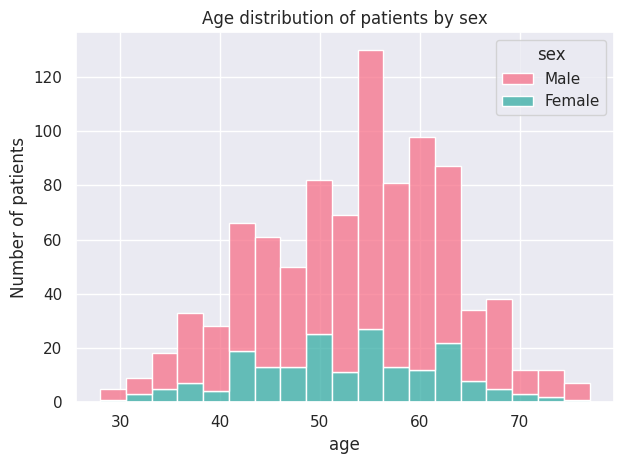

In [97]:
sns.histplot(df, x='age', hue='sex', multiple='stack', palette='husl')
plt.title('Age distribution of patients by sex')
plt.ylabel('Number of patients')
plt.tight_layout()

- There are more man than women, but it do not mean that men have heart disease more often than women, just that there are more men patients in the dataset.

Check the distribution of maximum heart rate achieved ('thalch') by sex.

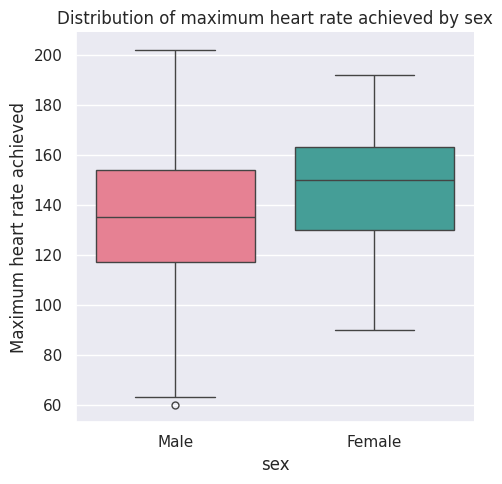

In [98]:
sns.catplot(data=df, x='sex', y='thalch', kind='box', palette='husl', hue='sex')
plt.title('Distribution of maximum heart rate achieved by sex')
plt.ylabel('Maximum heart rate achieved')
plt.tight_layout()

In [99]:
print('Maximum heart rate achieved summary statistics by sex:')
df[['thalch', 'sex']].groupby(['sex']).agg(['min', 'max', 'median', 'mean'])

Maximum heart rate achieved summary statistics by sex:


thalch                          
          min    max median        mean
sex                                    
Female   90.0  192.0  150.0  146.244792
Male     60.0  202.0  135.0  135.063893

- We see that women have in average higher maximum heart rate achieved.

Visualize the chest pain type ('cp') distribution of patients by sex.


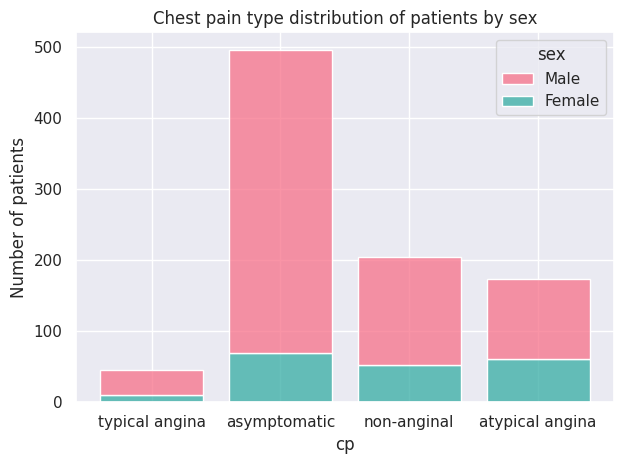

In [100]:
sns.histplot(df, x='cp', hue='sex', discrete=True, shrink=.8, multiple='stack', palette='husl')
plt.title('Chest pain type distribution of patients by sex')
plt.ylabel('Number of patients')
plt.tight_layout()


- We see from the plot that most of the men have asymptomatic chest pain type.

Check the relation between number of major vessels colored by flouroscopy ('ca') and the target ('num').

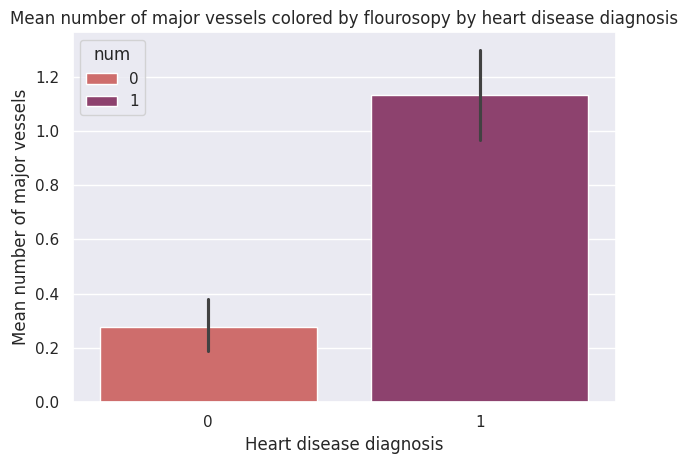

In [101]:
sns.barplot(df, x='num', y='ca', palette='flare', hue='num')
plt.title('Mean number of major vessels colored by flourosopy by heart disease diagnosis')
plt.ylabel('Mean number of major vessels')
plt.xlabel('Heart disease diagnosis')
plt.tight_layout()


- We see that the mean number of major vessels (0-3) colored by flourosopy is greater if the patient is diagnosed with heart disease and small otherwise.

See the relation between ST depression indiced by exercise relative to rest ('oldpeak') and the slope of the peak exercise ST segment ('slope').

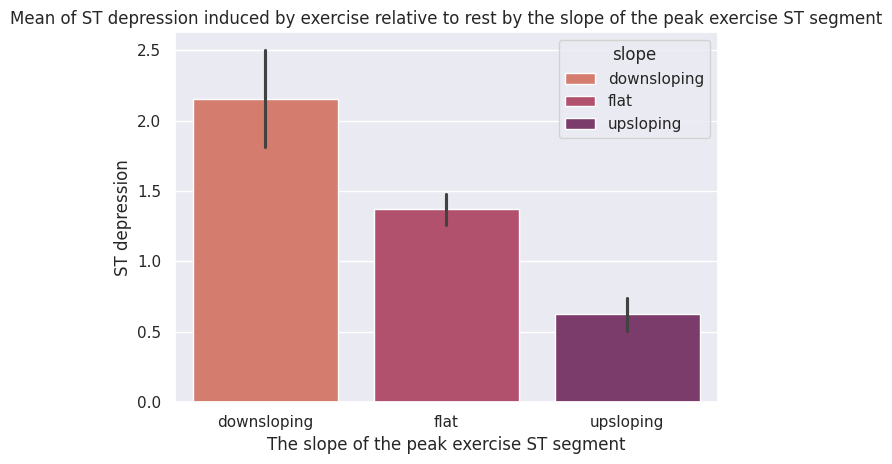

In [102]:
sns.barplot(df, x='slope', y='oldpeak', palette='flare', hue='slope')
plt.title('Mean of ST depression induced by exercise relative to rest by the slope of the peak exercise ST segment')
plt.ylabel('ST depression')
plt.xlabel('The slope of the peak exercise ST segment')
plt.tight_layout()

-  We observe that the ST depression is bigger when the slope is downslopping and smaller when the slope is upslopping.

See the relation between ST depression induced by exercise relative to rest ('oldpeak') and the target ('num').

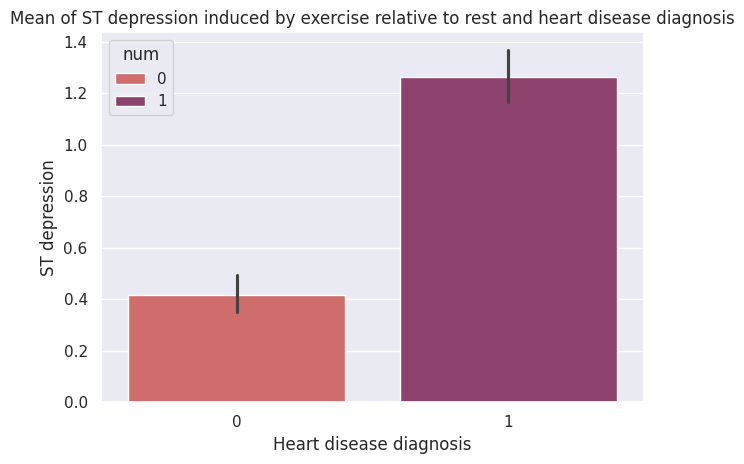

In [103]:
sns.barplot(df, x='num', y='oldpeak', palette='flare', hue='num')
plt.title('Mean of ST depression induced by exercise relative to rest and heart disease diagnosis')
plt.ylabel('ST depression')
plt.xlabel('Heart disease diagnosis')
plt.tight_layout()


- We see that ST depression is greater if the patient is diagnosed with heart disease.

See the relationship between mean of heart disease ('num') and exercise induced angina ('exang') by sex.


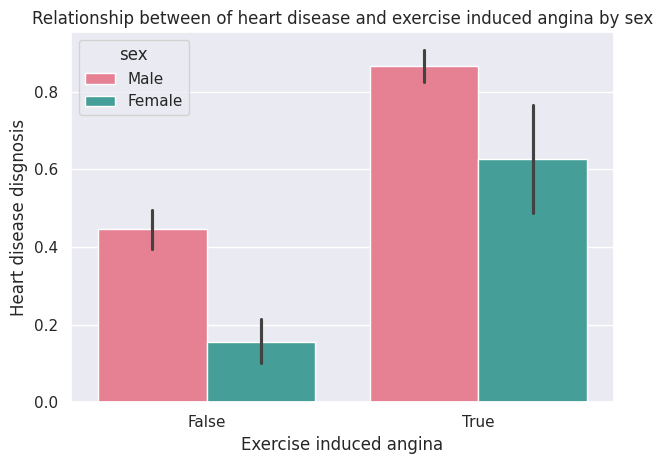

In [104]:
sns.barplot(df, x='exang', y='num', hue='sex', palette='husl')
plt.title('Relationship between of heart disease and exercise induced angina by sex')
plt.ylabel('Heart disease disgnosis')
plt.xlabel('Exercise induced angina')
plt.tight_layout()


- We see from the plot that the patients who have exercise induced angina are more likely to have heart disease.

Visualize the relationship between heart disease diagnosis ('num') and fasting blood sugar ('fbs') by sex.

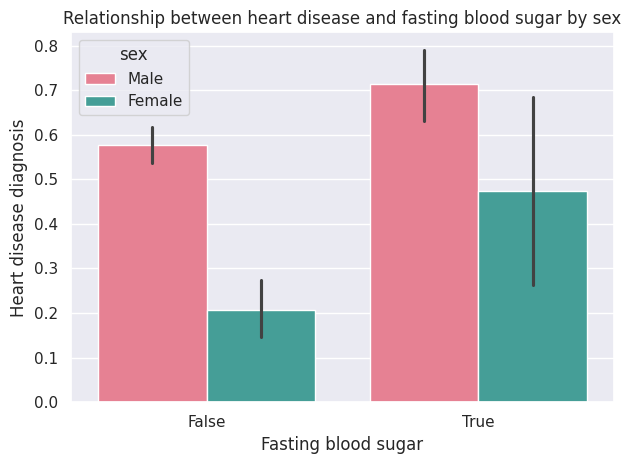

In [105]:
sns.barplot(df, x='fbs', y='num', hue='sex', palette='husl')
plt.title('Relationship between heart disease and fasting blood sugar by sex')
plt.ylabel('Heart disease diagnosis')
plt.xlabel('Fasting blood sugar')
plt.tight_layout()


- We see from the plot that people with fasting blood sugar have grater chances of being diagnosed with heart disease.

Visualize the relation between heart disease diagnosis ('num') with Thalassemia (normal, fixed defect, reversable defect) ('thal') and with the ECG observation at resting condition ('restecg').

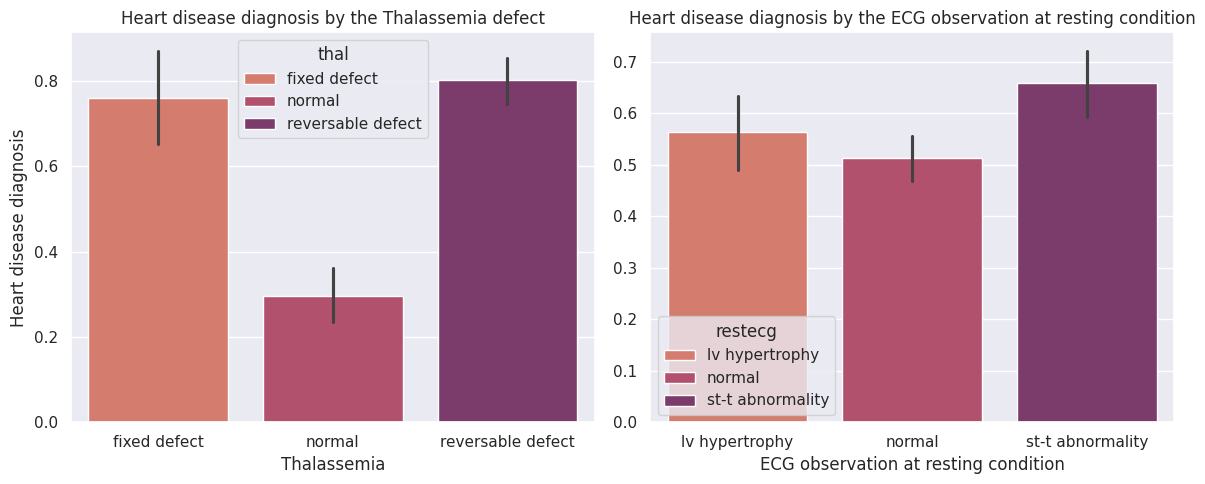

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(df, x='thal', y='num', palette='flare', hue='thal', ax=axes[0])
axes[0].set_title('Heart disease diagnosis by the Thalassemia defect')
axes[0].set_xlabel('Thalassemia')
axes[0].set_ylabel('Heart disease diagnosis')

sns.barplot(df, x='restecg', y='num', palette='flare', hue='restecg', ax=axes[1])
axes[1].set_title('Heart disease diagnosis by the ECG observation at resting condition')
axes[1].set_xlabel('ECG observation at resting condition')
axes[1].set_ylabel('')

plt.tight_layout()


- We see that normal thalassemia has smaller heart disease diagnosis than the fixied defect or reversable defect ones.
- We see that for the ECG statistics all 3 observations of ecg in patients do not show big differences, but patients with a normal ecg have smaller chances of having a heart disease than those with a st-t abnormality.

## Check for outliers

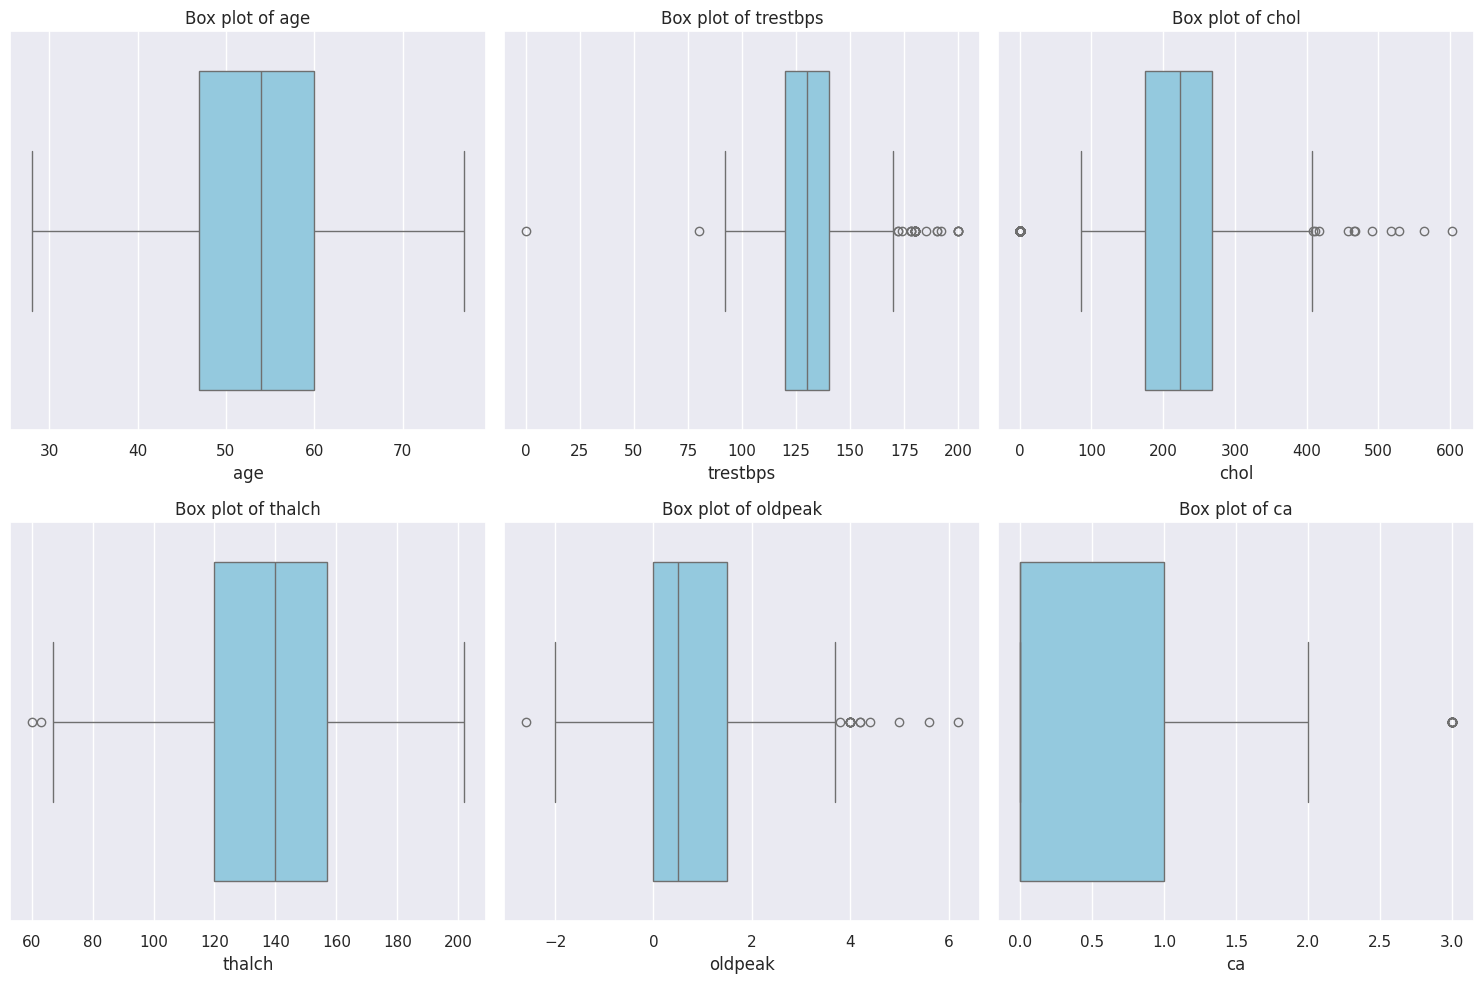

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns excluding 'id' and 'num'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'num' in numeric_cols:
    numeric_cols.remove('num')


# Determine the grid size
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- There are no unusual outliers so we decide to keep the values as they are

## Check for missing values and handle them

- Number of missing values in each column

In [108]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


- Percentage of missing values

In [109]:
def missing_values(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("The dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table = missing_values(df)
missing_values_table

The dataframe has 16 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
ca                   611               66.4
thal                 486               52.8
slope                309               33.6
fbs                   90                9.8
oldpeak               62                6.7
trestbps              59                6.4
exang                 55                6.0
thalch                55                6.0
chol                  30                3.3
restecg                2                0.2

- We can see that there are a lot of column which have missing values so we need to handle each one of them appropietly

### Handle missing values for numeric columns

The numeric columns that have missing values are: *tresbps*, *chol*, *thalch*, *oldpeak* and *ca*


- We see that the column *ca* has 66.4% of values missing, so we will not fill in these values because the patients most likely didn't thake the flouroscopy test, so we will fill these missing values with 0.

In [110]:
df['ca'] = df['ca'].fillna(0)
print(df['ca'].isnull().sum())

0


- For handling the missing values in the other numeric columns we will make a statistic based on age groups (from 10 in 10 years) and fill the null values for each column based on those statistics. These numeric columns have very few missing values (<7%), so the approach of average statistics per age groups is the best.

In [111]:
# Identify numeric columns with missing values
numeric_cols_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Create a copy of the DataFrame before imputation for comparison
df_before_imputation = df.copy()

# Create age groups (using bins)
# Adjust the bins based on your data distribution
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins, right=False)

# Calculate the mean of numeric columns for each age group
age_group_means = df.groupby('age_group', observed=True)[numeric_cols_with_missing].transform('mean')

# Fill missing values in the original DataFrame with the calculated means
df[numeric_cols_with_missing] = df[numeric_cols_with_missing].fillna(age_group_means)

# Check if missing values in numeric columns are handled
print("Missing values after imputation:")
print(df[numeric_cols_with_missing].isnull().sum())

Missing values after imputation:
trestbps    0
chol        0
thalch      0
oldpeak     0
dtype: int64


In [112]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num age_group  
0       fixed defect    0  [60, 70)  
1             normal    1  [60, 70)  
2  reversable defect    1  [60, 70)  
3             normal    0  [30, 40)  
4             normal    0  [40, 50)

- Plot the distribution of data before and after handling null values

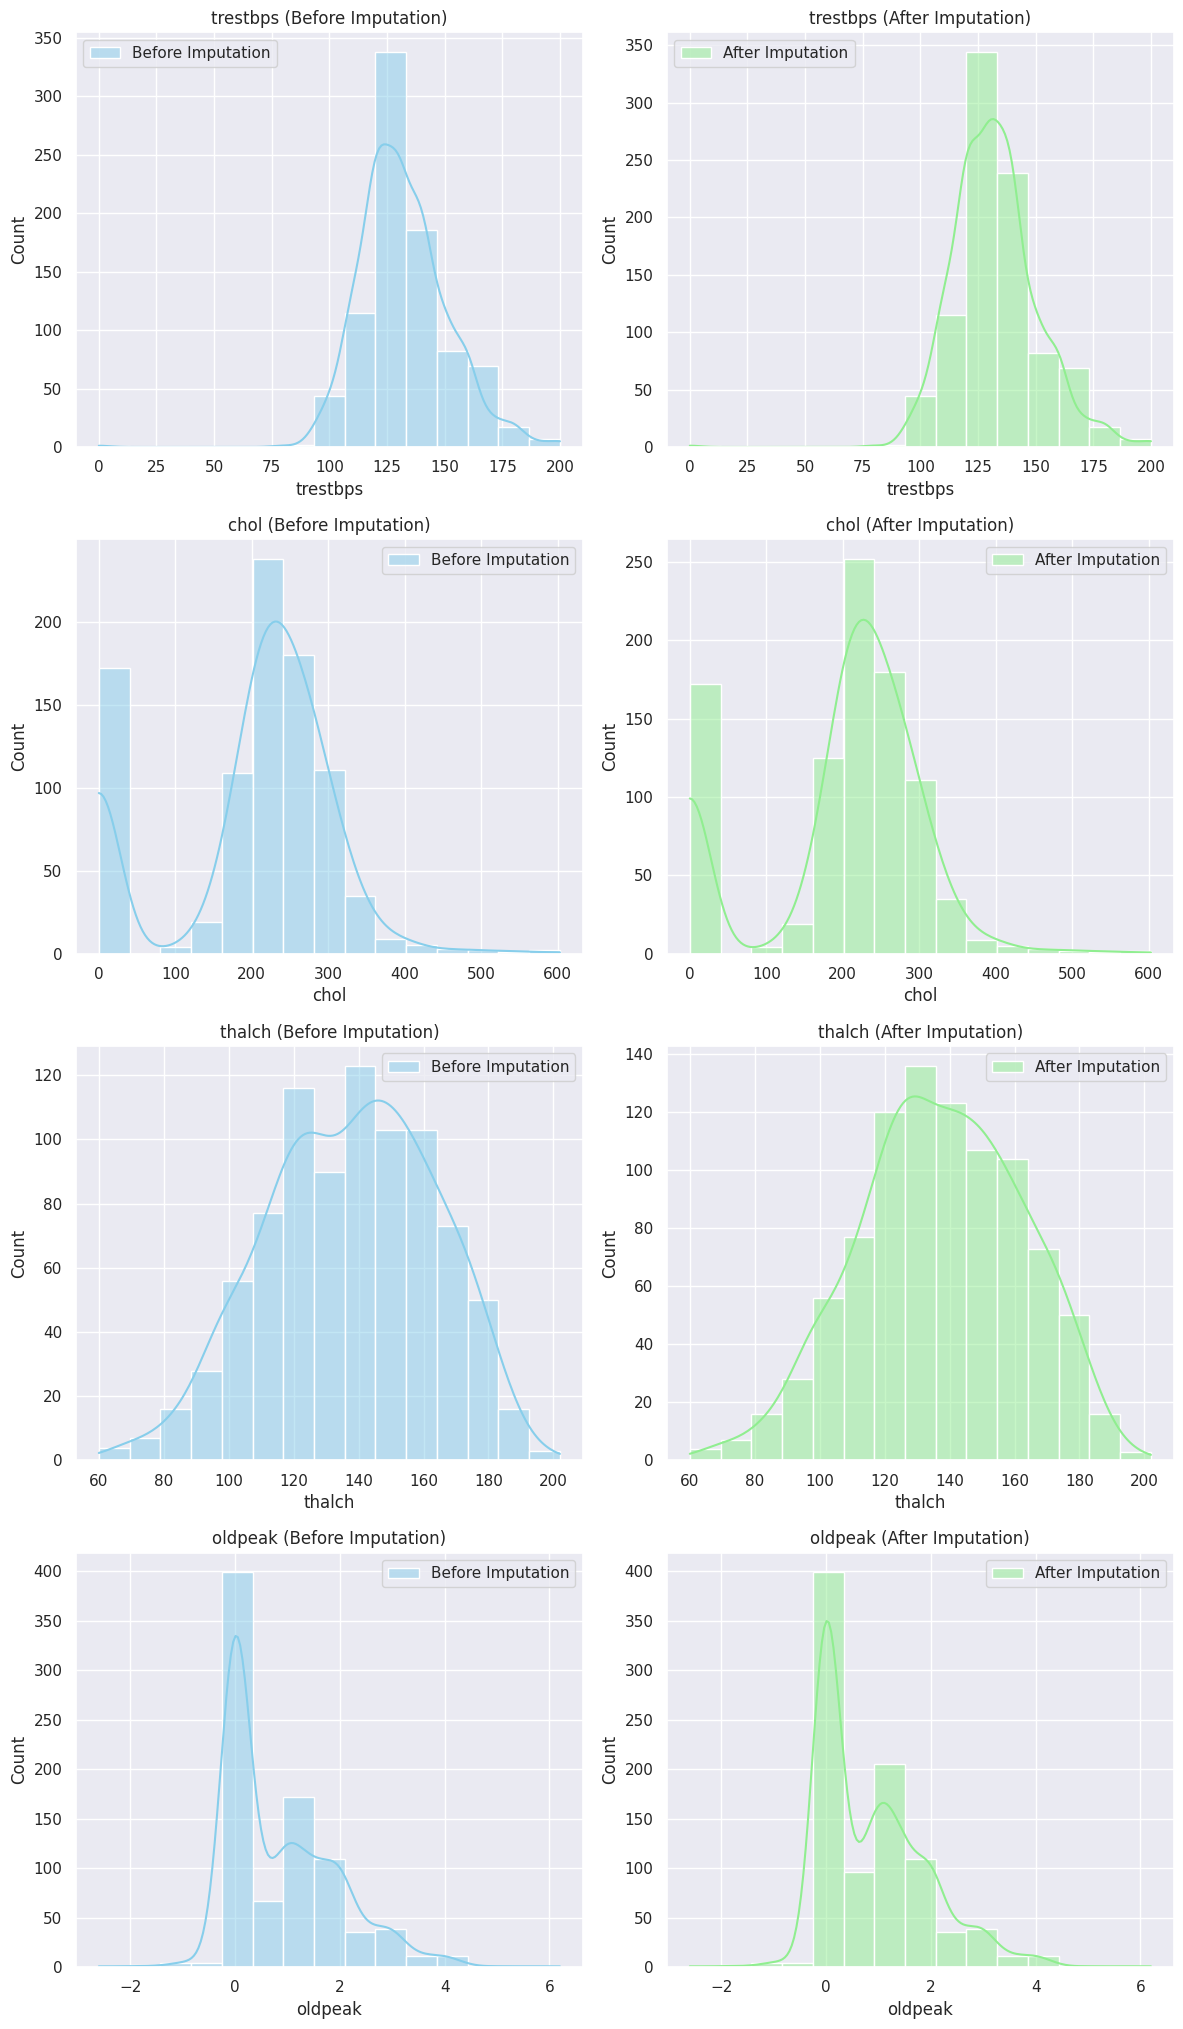

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions before and after imputation
n_cols = 2
n_rows = 5

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_with_missing):
    sns.histplot(df_before_imputation[col].dropna(), bins=15, kde=True, ax=axes[i*2], color='skyblue', label='Before Imputation')
    sns.histplot(df[col], bins=15, kde=True, ax=axes[i*2+1], color='lightgreen', label='After Imputation')
    axes[i*2].set_title(f'{col} (Before Imputation)')
    axes[i*2+1].set_title(f'{col} (After Imputation)')
    axes[i*2].legend()
    axes[i*2+1].legend()

# Hide any unused subplots
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- See the correlation matrix after handling missing values

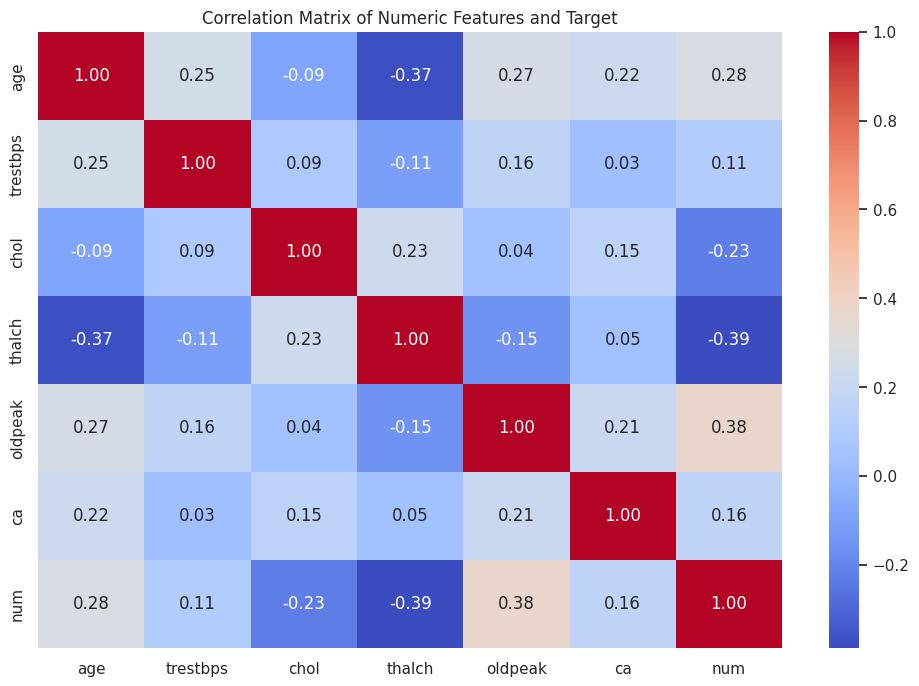

In [114]:
# Select numeric columns including the target, excluding 'id'
numeric_cols_with_target = df.select_dtypes(include=np.number).columns.tolist()
if 'id' in numeric_cols_with_target:
    numeric_cols_with_target.remove('id')

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols_with_target].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features and Target')
plt.show()

### Handle missing values for categorical columns

The categorical columns that have missing values are: *fbs*, *restecg*, *exang*, *slope* and *thal*


- For handling the missing values in the column *thal* we will fill those with the values 'normal'. There are 52.8% of patients with missing values for this column who probably didn't take the Thalassemia test, and we have seen before that the 'normal' value for Thalassemia column associates with a low rate of heart disease.

In [115]:
df['thal'] = df['thal'].fillna('normal')
print(df['thal'].isnull().sum())

0


- There are a lot of missing values for the *slope* column, where 33.6% of patients do not have a value for this column. We have seen before that the slope of the peak exercise ST segment is stongly correlated with the ST depression induced by exercise relative to rest ('oldpeak'). So we will fill the missing values of 'slope' based on the values of 'oldpeak'.

In [116]:
# Handle missing values for 'slope' based on 'oldpeak'
# Create bins for 'oldpeak'
oldpeak_bins = [-3, 0, 1, 2, 7] # Adjust bins based on oldpeak distribution
df['oldpeak_group'] = pd.cut(df['oldpeak'], bins=oldpeak_bins, right=False)

# Impute missing 'slope' values with the mode of each oldpeak group
df['slope'] = df.groupby('oldpeak_group', observed=True)['slope'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)).infer_objects(copy=False)

# Drop the temporary 'oldpeak_group' column
df.drop('oldpeak_group', axis=1, inplace=True)

print("Missing values after slope imputation:")
print(df['slope'].isnull().sum())

Missing values after slope imputation:
0


- For handling the other missing values from the categorical columns we will make a statistic based on age groups (from 10 in 10 years) and fill the null values for each column based on those statistic using *mode*. The remaining columns have very few missing values (<10%), so the approach of filling these values with the most frequent value based on age groups is the best one.

In [117]:
# Identify categorical columns with missing values
categorical_cols_with_missing = ['fbs', 'restecg', 'exang']

# Create a copy of the DataFrame before imputation for comparison
df_before_categorical_imputation = df.copy()

pd.set_option('future.no_silent_downcasting', True)

# Impute missing categorical values with the mode of each age group
for col in categorical_cols_with_missing:
    df[col] = df.groupby('age_group', observed=True)[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None)).infer_objects(copy=False)

df.drop('age_group', axis=1, inplace=True)

# Check if missing values in categorical columns are handled
print("Missing values after categorical imputation:")
print(df[categorical_cols_with_missing].isnull().sum())

Missing values after categorical imputation:
fbs        0
restecg    0
exang      0
dtype: int64


In [118]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    1  
2  reversable defect    1  
3             normal    0  
4             normal    0

- Plot the distribution of data before and after handling null values

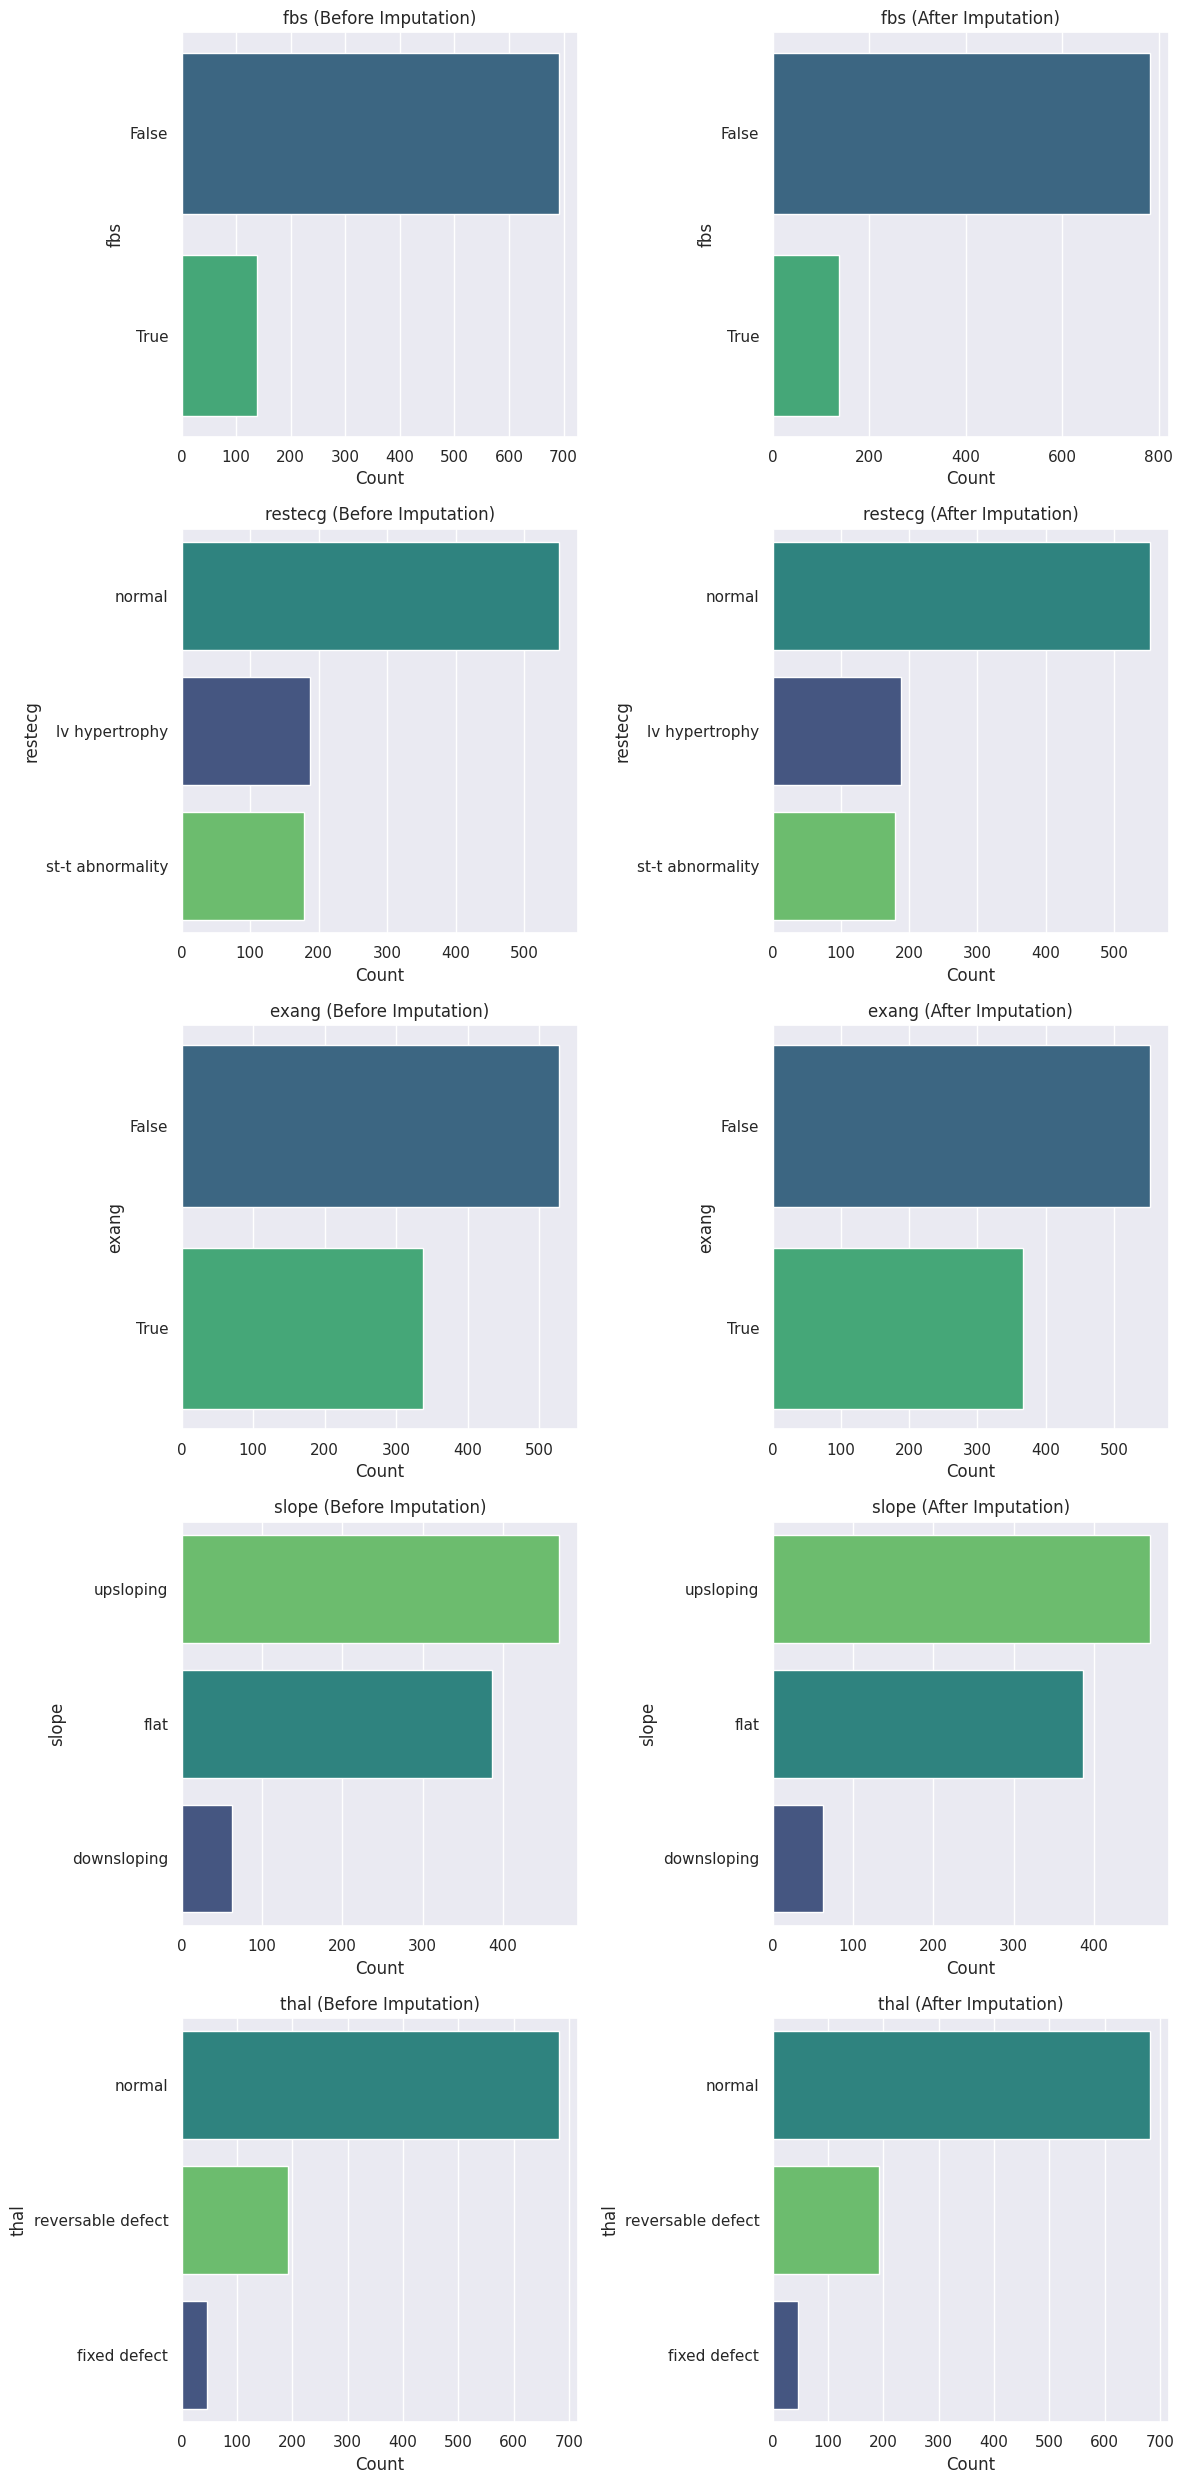

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns with missing values
categorical_cols_with_missing = ['fbs', 'restecg', 'exang', 'slope', 'thal']

# Plot distributions before and after imputation
n_cols = 2
n_rows = (len(categorical_cols_with_missing) * 2 + n_cols - 1) // n_cols # Calculate rows needed for 2 plots per column

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols_with_missing):
    # Before imputation
    sns.countplot(data=df_before_categorical_imputation.dropna(subset=[col]), y=col, ax=axes[i*2], order=df_before_categorical_imputation[col].value_counts().index, palette='viridis', hue=col, legend=False)
    axes[i*2].set_title(f'{col} (Before Imputation)')
    axes[i*2].set_xlabel('Count')
    axes[i*2].set_ylabel(col)

    # After imputation
    sns.countplot(data=df, y=col, ax=axes[i*2+1], order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)
    axes[i*2+1].set_title(f'{col} (After Imputation)')
    axes[i*2+1].set_xlabel('Count')
    axes[i*2+1].set_ylabel(col)

# Hide any unused subplots
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Feature engineering

### Create the 'age_group' feature

Create a new feature based on ages.
- age < 18 -> child
- age < 30 -> young adult
- age < 50 -> adult
- age < 65 -> middle aged
- age >= 65 -> senior

In [120]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 30:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    elif age < 65:
        return 'Middle Aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

# Display the value counts of the new feature
print(df['age_group'].value_counts())

age_group
Middle Aged    525
Adult          288
Senior         103
Young Adult      4
Name: count, dtype: int64


In [121]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num    age_group  
0       fixed defect    0  Middle Aged  
1             normal    1       Senior  
2  reversable defect    1       Senior  
3             normal    0        Adult  
4             normal    0        Adult

- Visualize the distribution of patients by age group and sex in relation with the heart disease diagnosis.

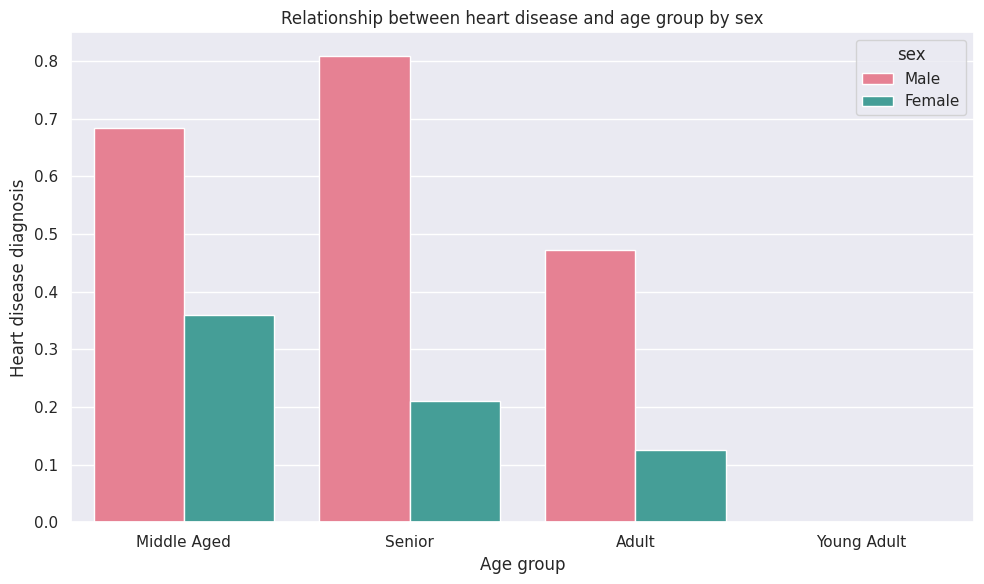

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(df, x='age_group', y='num', hue='sex', palette='husl', errorbar=None)
plt.title('Relationship between heart disease and age group by sex')
plt.ylabel('Heart disease diagnosis')
plt.xlabel('Age group')
plt.tight_layout()


-  We see from the plot that mostly seniors and middle aged male patients have a high chance of heart disease.

### Create the 'chol_group' feature

Create a new feature from the 'chol' column, the 'chol_group' feature, to help with the classification of cholesterol values.
- chol < 200 -> normal cholesterol level (0)
- chol <= 239 -> mild-high cholesterol level (1)
- chol <= 299 -> high cholesterol level (2)
- chol >= 300 -> very high cholesterol (3)

In [123]:
def cholesterol_group(chol):
    if chol < 200:
        return 0
    elif chol <= 239:
        return 1
    elif chol <= 299:
        return 2
    else:
        return 3

df["chol_group"] = df["chol"].apply(cholesterol_group)

In [124]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num    age_group  chol_group  
0       fixed defect    0  Middle Aged           1  
1             normal    1       Senior           2  
2  reversable defect    1       Senior           1  
3             normal    0        Adult           2  
4             normal    0        Adult           1

- Visualize the distribution of patients by cholesterol level class and sex in relation with the heart disease diagnosis.

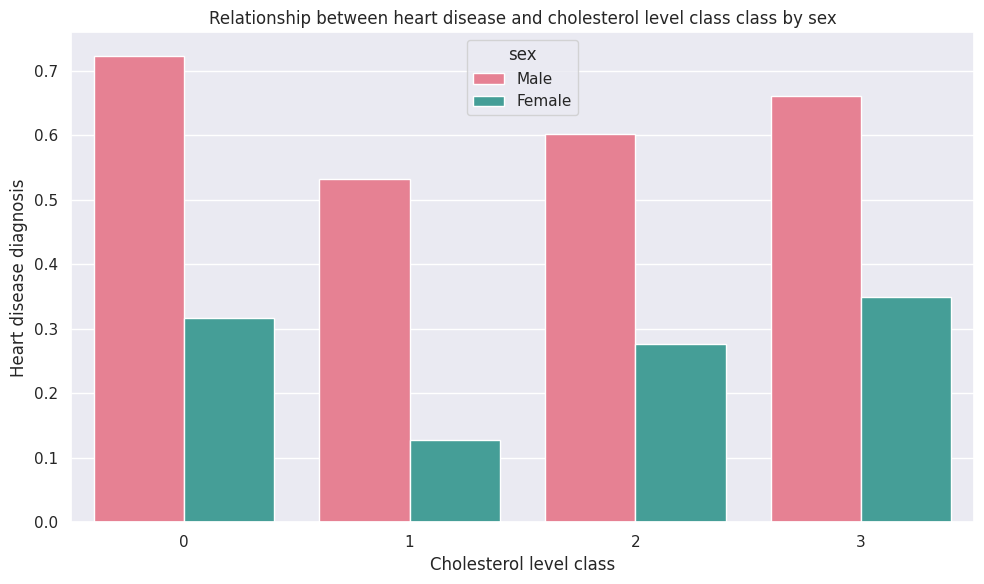

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(df, x='chol_group', y='num', hue='sex', palette='husl', errorbar=None)
plt.title('Relationship between heart disease and cholesterol level class class by sex')
plt.ylabel('Heart disease diagnosis')
plt.xlabel('Cholesterol level class')
plt.tight_layout()
plt.show()

-  We see from the plot that there are a lot of patients, especially males, who have a very high chance of a heart disease diagnosis even if their cholesterol level is normal

### Create the 'trestbps_class' feature

Create a new feature from the 'trestbps' column, the 'trestbps_class' feature, to help with better classification of resting blood pressure levels.
- trestbps < 120 -> normal tension level
- trestbps < 130 -> elevated tension level
- trestbps < 140 -> hypertension stage 1
- trestbps < 180 -> hypertension stage 2
- trestbps >= 180 -> hypertensive crisis

In [126]:
def categorize_trestbps(trestbps):
    if trestbps < 120:
        return 'Normal'
    elif trestbps < 130:
        return 'Elevated'
    elif trestbps < 140:
        return 'Hypertension Stage 1'
    elif trestbps < 180:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'

df['trestbps_class'] = df['trestbps'].apply(categorize_trestbps)

# Display the value counts of the new feature
print(df['trestbps_class'].value_counts())

trestbps_class
Hypertension Stage 2    295
Hypertension Stage 1    226
Elevated                217
Normal                  162
Hypertensive Crisis      20
Name: count, dtype: int64


In [127]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num    age_group  chol_group        trestbps_class  
0       fixed defect    0  Middle Aged           1  Hypertension Stage 2  
1             normal    1       Senior           2  Hypertension Stage 2  
2  reversable defect    1       Senior           1              Elevated  
3             normal    0        Adult           2  Hypertension Stage 1  
4             normal    0        Adult           1  Hypertension Stage 1

- Visualize the distribution of patients by resting blood pressure class and sex in relation with the heart disease diagnosis.

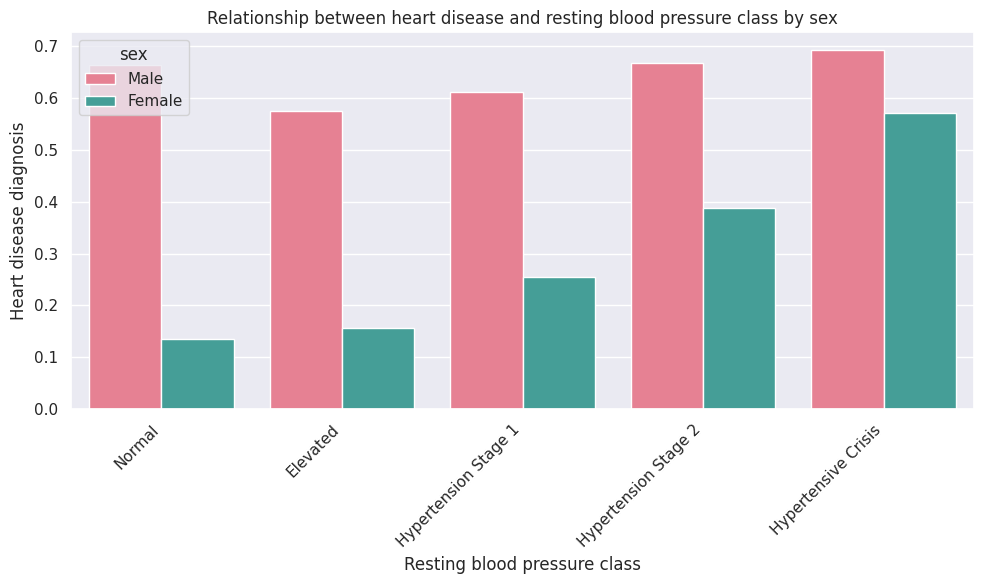

In [128]:
plt.figure(figsize=(10, 6))

# Calculate the mean heart disease diagnosis for females for each trestbps_class
female_trestbps_order = df[df['sex'] == 'Female'].groupby('trestbps_class')['num'].mean().sort_values().index

sns.barplot(df, x='trestbps_class', y='num', hue='sex', palette='husl', errorbar=None, order=female_trestbps_order) # Remove error bars
plt.title('Relationship between heart disease and resting blood pressure class by sex')
plt.ylabel('Heart disease diagnosis')
plt.xlabel('Resting blood pressure class')
plt.xticks(rotation=45, ha='right') # Tilt x-axis labels
plt.tight_layout()
plt.show()

-  We see from the plot that as the resting blood pressure increases, the heart disease rates increase too.

## Encode categorical variables

To encode the categorical features, we decided to:
- Use Label Encoding for our newly created features: 'trestbps_class' and 'age_group'
- Map the boolean features from (True/False) to (1/0): 'fbs' and 'exang'
- Use One-Hot encoding for the other categorical features: 'sex', 'dataset', 'cp', 'restecg', 'slope' and 'thal'

In [129]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'trestbps_class' and 'age_group'
df['trestbps_class_encoded'] = label_encoder.fit_transform(df['trestbps_class'])
df['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])

# Map boolean features to 0 and 1
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

# Select columns for One-Hot Encoding (excluding the original categorical and boolean ones we just mapped)
one_hot_cols = ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Drop the original 'trestbps_class' and 'age_group' columns
df = df.drop(['trestbps_class', 'age_group'], axis=1)


print("DataFrame after encoding:")
display(df.head())

DataFrame after encoding:


id  age  trestbps   chol  fbs  thalch  exang  oldpeak   ca  num  ...  \
0   1   63     145.0  233.0    1   150.0      0      2.3  0.0    0  ...   
1   2   67     160.0  286.0    0   108.0      1      1.5  3.0    1  ...   
2   3   67     120.0  229.0    0   129.0      1      2.6  2.0    1  ...   
3   4   37     130.0  250.0    0   187.0      0      3.5  0.0    0  ...   
4   5   41     130.0  204.0    0   172.0      0      1.4  0.0    0  ...   

   dataset_VA Long Beach  cp_atypical angina  cp_non-anginal  \
0                  False               False           False   
1                  False               False           False   
2                  False               False           False   
3                  False               False            True   
4                  False                True           False   

   cp_typical angina  restecg_normal  restecg_st-t abnormality  slope_flat  \
0               True           False                     False       False   
1              False           False                     False        True   
2              False           False                     False        True   
3              False            True                     False       False   
4              False           False                     False       False   

   slope_upsloping  thal_normal  thal_reversable defect  
0            False        False                   False  
1            False         True                   False  
2            False        False                    True  
3            False         True                   False  
4             True         True                   False  

[5 rows x 26 columns]

## Split the dataset into Train and Test

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(['id', 'num'], axis=1) # Drop 'id' and the target variable
y = df['num']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (736, 24)
Testing set shape: (184, 24)


# **2. Feature Analysis**
- Create correlation matrix heatmap to identify relationships

- Analyze class distribution (healthy vs. heart disease)

- Scale features for algorithms that require it


## Visualize correlations between the new encoded features and target

Create correlation matrix heatmap to identify relationships between the numeric features and the target 'num'

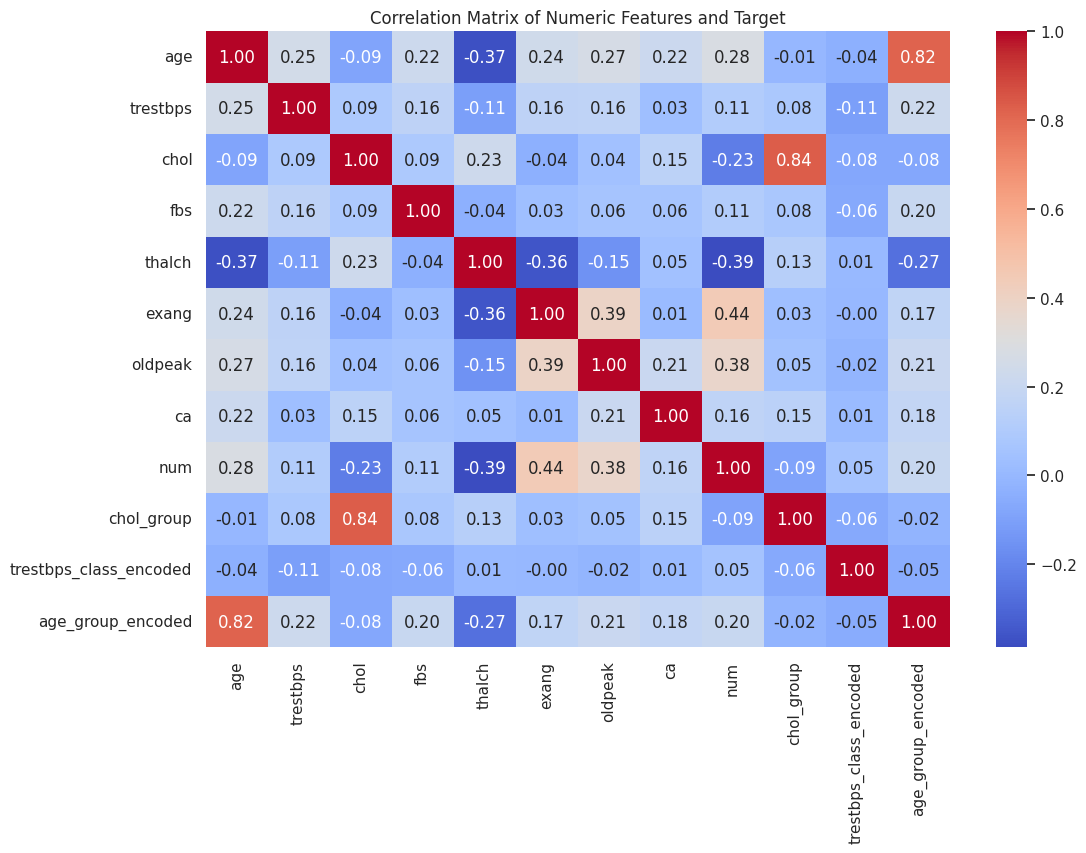

In [131]:
# Select numeric columns including the target, excluding 'id'
numeric_cols_with_target = df.select_dtypes(include=np.number).columns.tolist()
if 'id' in numeric_cols_with_target:
    numeric_cols_with_target.remove('id')

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols_with_target].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features and Target')
plt.show()

- From the correlation matrix we see that the most strongly positively correlated features with the target are 'exang' and 'oldpeak' and the strongest negatively correlated feature with the target is 'thalch'.

Visualize the relationship between categorical features and the target

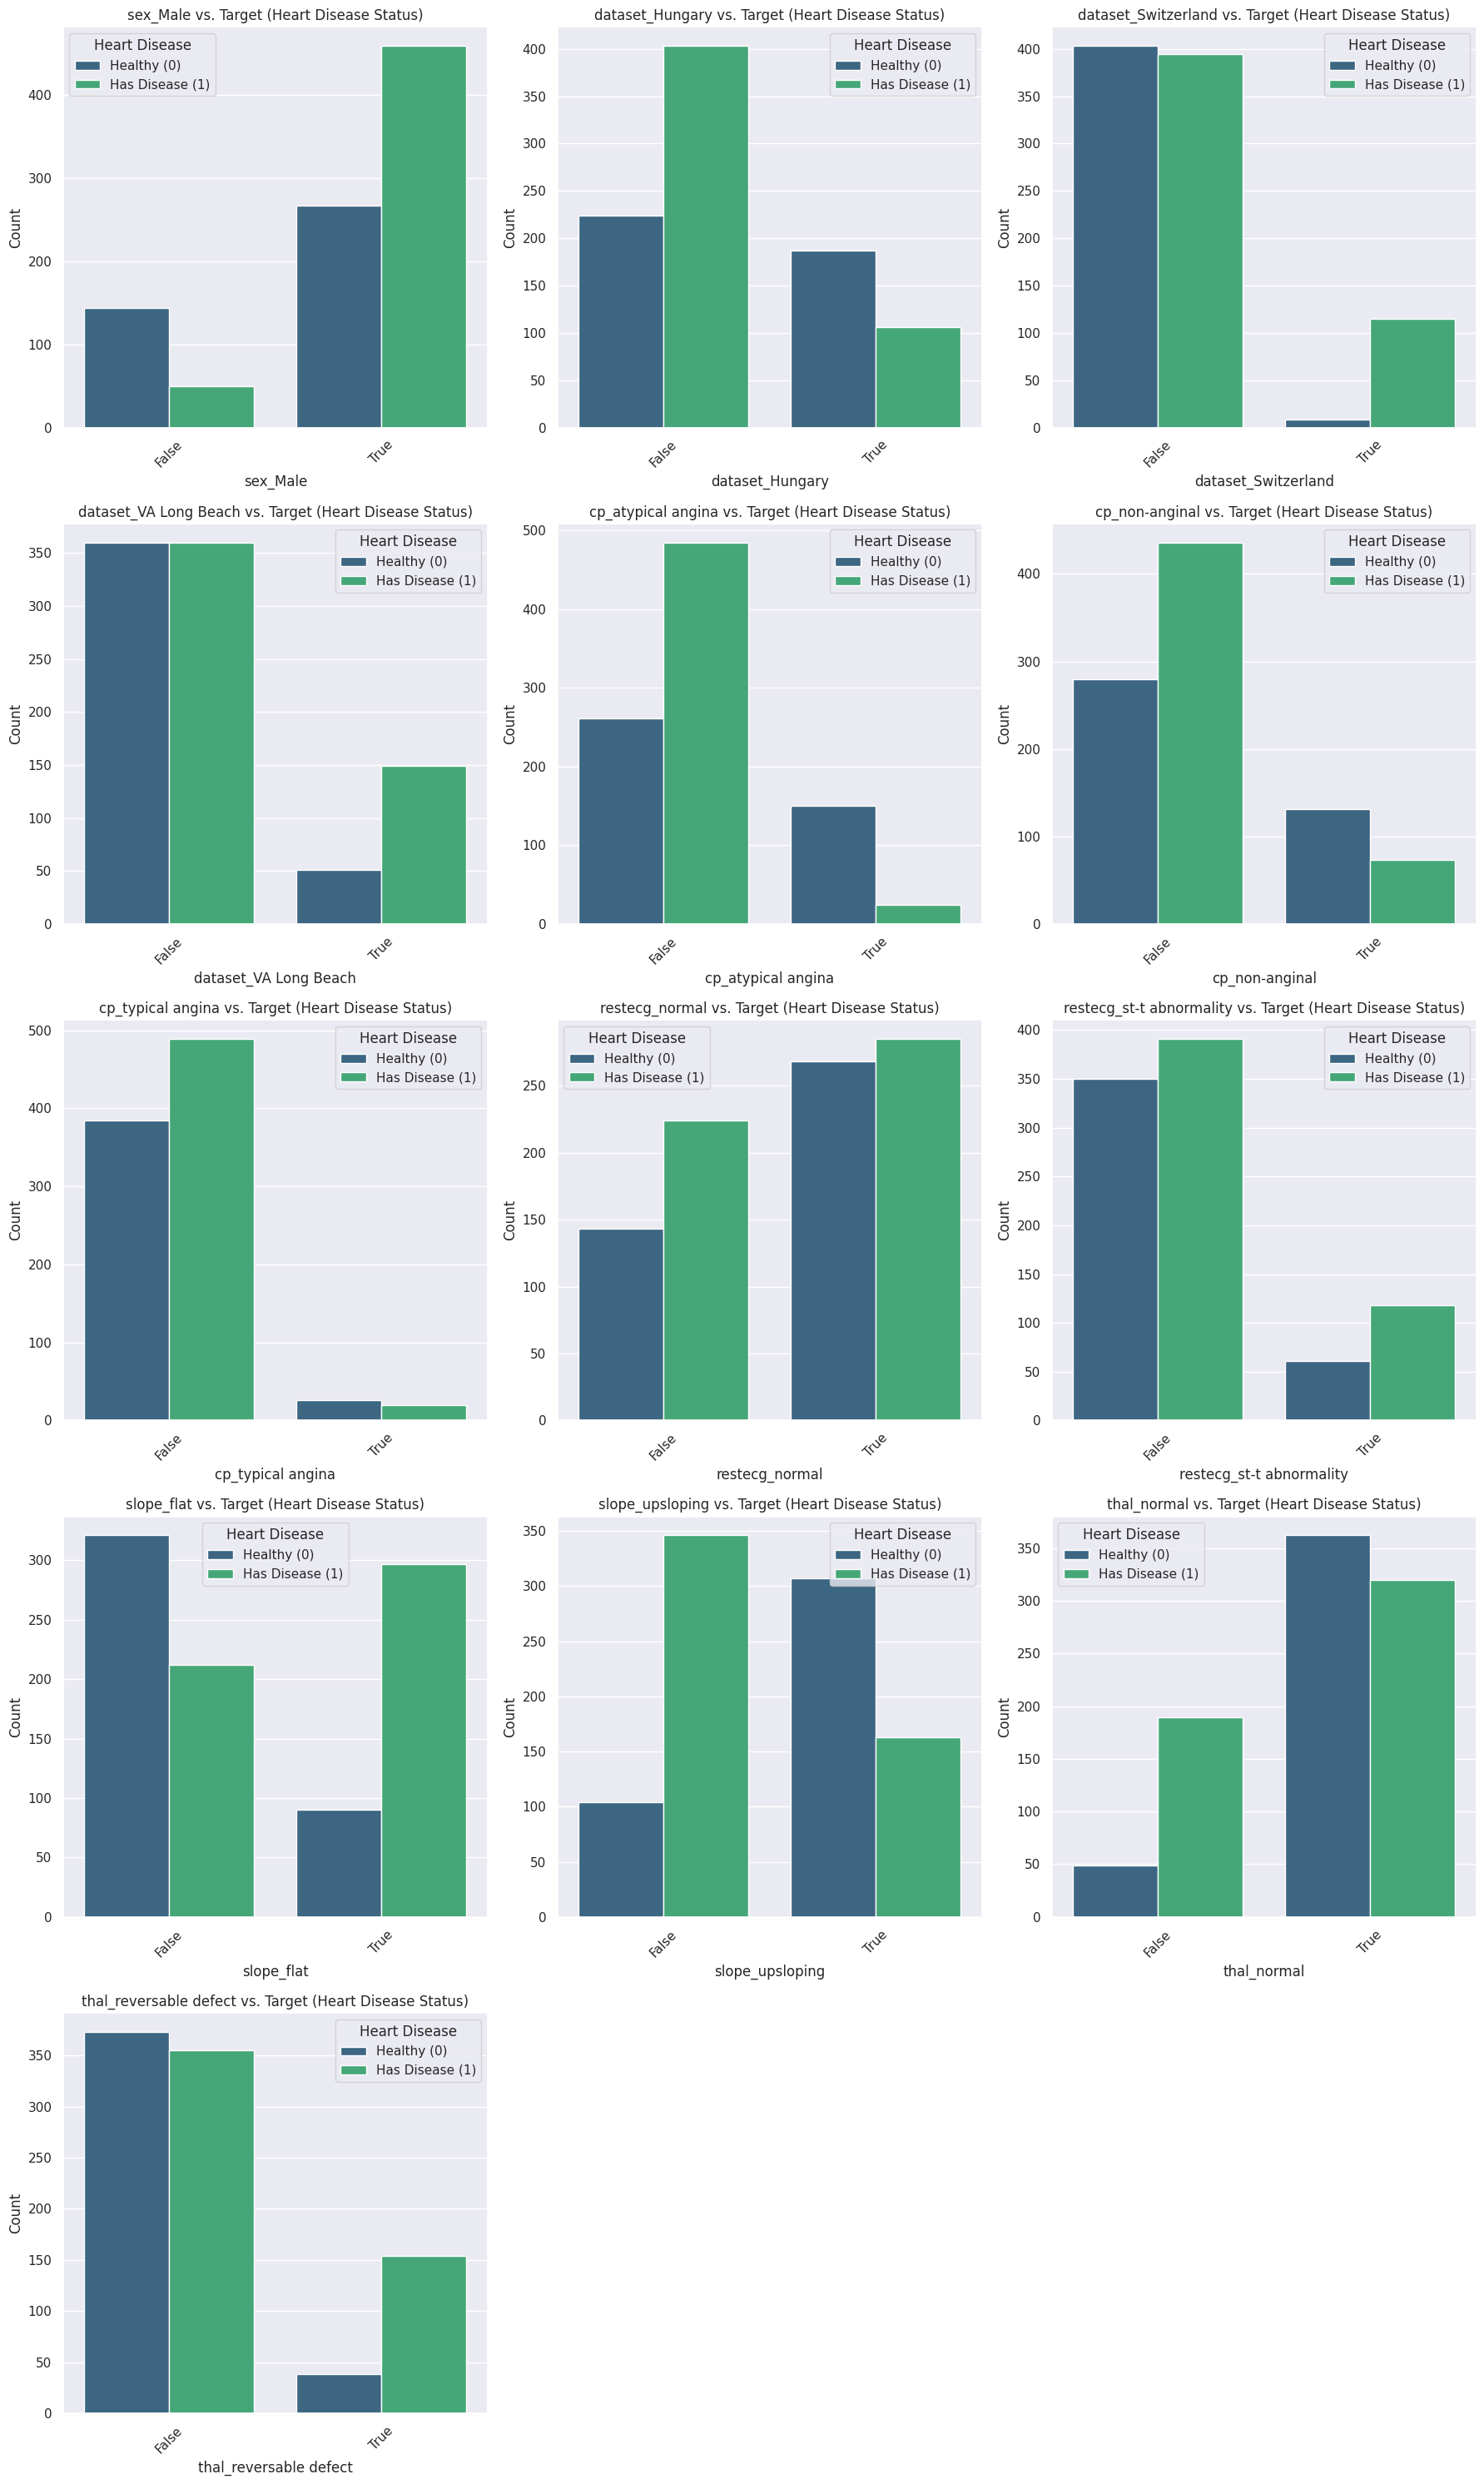

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical and boolean columns
categorical_and_bool_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
# Remove the target variable if it's included in the selection
if 'num' in categorical_and_bool_cols:
    categorical_and_bool_cols.remove('num')


# Determine the grid size for categorical plots
n_cols_cat = 3
n_rows_cat = (len(categorical_and_bool_cols) + n_cols_cat - 1) // n_cols_cat

# Create subplots for categorical features vs. target
fig, axes = plt.subplots(nrows=n_rows_cat, ncols=n_cols_cat, figsize=(18, 6 * n_rows_cat))
axes = axes.flatten()

for i, col in enumerate(categorical_and_bool_cols):
    sns.countplot(data=df, x=col, hue='num', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs. Target (Heart Disease Status)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Heart Disease', labels=['Healthy (0)', 'Has Disease (1)'])


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

## Feature selection

- Feature selection by feature scores

In [133]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

df_feat = df.copy()

# Separate features (X) and target (y)
X = df_feat.drop('num', axis=1)
y = df_feat['num']

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to your data
selector.fit(X, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to target:")
print(sorted_feature_scores)

Feature Relevance to target:
exang                       222.659416
slope_upsloping             201.664244
cp_atypical angina          178.491726
thalch                      162.033825
oldpeak                     151.152901
slope_flat                  142.977549
id                          133.301971
sex_Male                     95.719131
dataset_Switzerland          91.868943
thal_normal                  81.899803
age                          79.738300
dataset_Hungary              68.381001
thal_reversable defect       64.936765
chol                         50.799661
cp_non-anginal               42.272265
dataset_VA Long Beach        39.564254
age_group_encoded            39.193343
ca                           25.613695
fbs                          10.848369
trestbps                     10.614087
restecg_st-t abnormality     10.184615
chol_group                    8.276246
restecg_normal                8.105665
cp_typical angina             2.752216
trestbps_class_encoded        2.480

## Scale the features for algorithms that require it

- Scale the features using *Standard Scaler*

In [134]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining set scaled shape:", X_train_scaled.shape)
print("Testing set scaled shape:", X_test_scaled.shape)


Training set scaled shape: (736, 24)
Testing set scaled shape: (184, 24)


# **3. Model Implementation**

Implement and train all four classification methods:

- Logistic Regression

- Decision Tree: Tune max_depth and min_samples_split

- Random Forest: Tune n_estimators and max_depth

- Support Vector Machine: Try both linear and RBF kernels, tune C

Define some helper functions.

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name, class_names=['No heart disease', 'Heart disease']):
    """
    Evaluates a classification model by printing a classification report
    and displaying a confusion matrix.
    """
    print(f"\n--- {model_name} Evaluation ---")
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    # Plot the confusion matrix and get the axes object
    ax = disp.plot(cmap=plt.cm.Blues).ax_
    # Turn off the grid lines on the axes
    ax.grid(False)
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

# Helper function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title,
                             feature_names=['X1', 'X2'], class_names=['Class 1', 'Class 2', 'Class 3'],
                             control_column=None, control_value=0, ax=None, figsize=(12, 6), samples=300,
                             x1_padding=0, x2_padding=0,
                             X_scaler=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    x1_range = np.linspace(X[feature_names[0]].min() - x1_padding, X[feature_names[0]].max() + x1_padding, samples)
    x2_range = np.linspace(X[feature_names[1]].min() - x2_padding, X[feature_names[1]].max() + x2_padding, samples)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

    if control_column is not None:
        # Create a DataFrame for prediction with the correct columns
        predict_vals_df = pd.DataFrame(np.c_[np.full(x1_mesh.size, control_value), x1_mesh.ravel(), x2_mesh.ravel()],
                                      columns=[control_column] + feature_names)
    else:
        # Create a DataFrame for prediction with the correct columns
        predict_vals_df = pd.DataFrame(np.c_[x1_mesh.ravel(), x2_mesh.ravel()],
                                      columns=feature_names)


    if X_scaler is not None:
        predict_vals_df = pd.DataFrame(X_scaler.transform(predict_vals_df), columns=predict_vals_df.columns)


    # Predict on the meshgrid
    Z = model.predict(predict_vals_df)
    Z = Z.reshape(x1_mesh.shape)

    # Plot the contour and training examples
    ax.contourf(x1_mesh, x2_mesh, Z, alpha=0.4, cmap='RdYlGn')
    scatter = ax.scatter(X[feature_names[0]], X[feature_names[1]], c=y, s=20, edgecolor='k', cmap='RdYlGn')

    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.legend(handles=scatter.legend_elements()[0], labels=class_names)

    return ax

## Logistic Regression

### Single predictor

First, we use the logistic regression with a single predictor. We choose 'oldpeak' as the predictor because it is one the most correlated feature which is not binary, based on the feature scores.

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [137]:
# First, create and fit models for single predictor (oldpeak)
X_train_oldpeak = X_train[['oldpeak']]
X_test_oldpeak = X_test[['oldpeak']]

# For the single predictor model, we'll use the 'oldpeak' column
scaler_oldpeak = StandardScaler()
X_train_oldpeak_scaled = scaler_oldpeak.fit_transform(X_train_oldpeak)
X_test_oldpeak_scaled = scaler_oldpeak.transform(X_test_oldpeak)

print("Shape of X_train_oldpeak_scaled:", X_train_oldpeak_scaled.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_oldpeak_scaled: (736, 1)
Shape of y_train: (736,)


In [138]:
# Fit single predictor model on oldpeak
single_predictor_oldpeak_model = LogisticRegression(random_state=42)
single_predictor_oldpeak_model.fit(X_train_oldpeak_scaled, y_train)

LogisticRegression(random_state=42)

In [139]:
# Get coefficients for single predictor model
single_predictor_oldpeak_intercept = single_predictor_oldpeak_model.intercept_[0]
single_predictor_oldpeak_coef = single_predictor_oldpeak_model.coef_[0][0]

print("Single predictor logistic regression model:")
print(f"Intercept: {single_predictor_oldpeak_intercept:.6f}")
print(f"Coefficient: {single_predictor_oldpeak_coef:.6f}")

Single predictor logistic regression model:
Intercept: 0.297235
Coefficient: 0.952710


- Evaluate the model and visualize its confusion matrix


--- Single Predictor LR Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No heart disease       0.65      0.73      0.69        82
   Heart disease       0.76      0.68      0.72       102

        accuracy                           0.70       184
       macro avg       0.70      0.70      0.70       184
    weighted avg       0.71      0.70      0.70       184



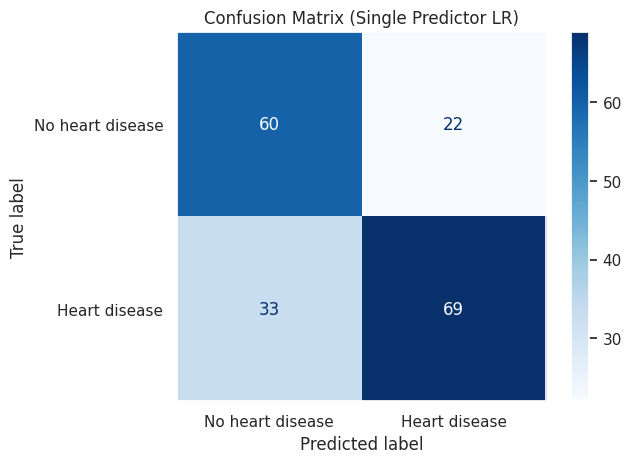

In [140]:
evaluate_model(single_predictor_oldpeak_model, X_test_oldpeak_scaled, y_test, "Single Predictor LR")

We see from the matrix that the Logistic Regression model with a single predictor does not have the best precision and f1 scores.
- There are 33 false negative values, meaning that those patients have a heart disease, but the model predicted that they don't
- There are 22 false positive values, meaning that those patients don't have a heart disease, but the model predicted that they do

### Multiple predictors

Now, we'll try fitting a Logistic Regression model on multiple predictors from the dataset:  *exang* , *slope_upsloping* and *oldpeak* and *slope_flat* (some of the first most correlated features with the target 'num').

In [141]:
# Define the features
selected_features = ['exang', 'slope_upsloping','oldpeak']
# Select the subset of features for training and testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit StandardScaler on the selected features
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

print("Training set selected shape:", X_train_selected_scaled.shape)
print("Testing set selected shape:", X_test_selected_scaled.shape)

# Initialize and fit Logistic Regression model on the selected features
multiple_predictor_logistic_model_selected = LogisticRegression(random_state=42)
multiple_predictor_logistic_model_selected.fit(X_train_selected_scaled, y_train)

# Get coefficients for the selected features
selected_feature_names = X_train_selected.columns.tolist()
selected_multiple_predictor_intercept = multiple_predictor_logistic_model_selected.intercept_[0]
selected_multiple_predictor_coefficients = multiple_predictor_logistic_model_selected.coef_[0]

# Create coefficient table
coef_table_selected = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': selected_multiple_predictor_coefficients
})

print("\nMultiple predictor logistic regression model (with selected features):")
print(f"\nIntercept: {selected_multiple_predictor_intercept:.6f}")
print(coef_table_selected)

Training set selected shape: (736, 3)
Testing set selected shape: (184, 3)

Multiple predictor logistic regression model (with selected features):

Intercept: 0.338788
           Feature  Coefficient
0            exang     0.697803
1  slope_upsloping    -0.427664
2          oldpeak     0.464553


- Evaluate the model and see its confusion matrix


--- Multiple Predictors LR Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No heart disease       0.70      0.73      0.71        82
   Heart disease       0.78      0.75      0.76       102

        accuracy                           0.74       184
       macro avg       0.74      0.74      0.74       184
    weighted avg       0.74      0.74      0.74       184



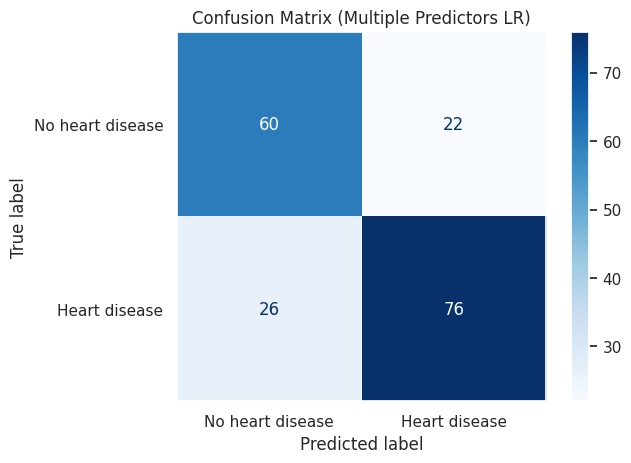

In [142]:
evaluate_model(multiple_predictor_logistic_model_selected, X_test_selected_scaled, y_test, "Multiple Predictors LR")

- We see from the matrix that the model trained with more predictors has better metrics than the model trained with a single predictor.

#### Making & Visualizing Predictions with Logistic Regression

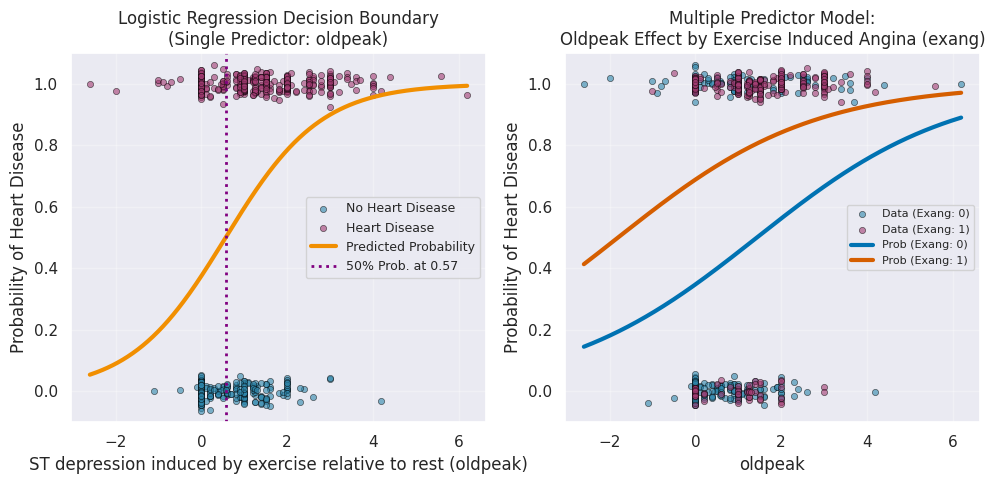

In [143]:
plt.figure(figsize=(15, 5))

# Plot 1: Single predictor model (oldpeak)
plt.subplot(1, 3, 1)

# Generate smooth prediction curve for oldpeak - FIX: Use DataFrame instead of numpy array
oldpeak_range = np.linspace(X_train['oldpeak'].min(), X_train['oldpeak'].max(), 300)
oldpeak_range_df = pd.DataFrame(oldpeak_range, columns=['oldpeak'])  # Convert to DataFrame
oldpeak_range_scaled = scaler_oldpeak.transform(oldpeak_range_df)   # Now no warning
probabilities = single_predictor_oldpeak_model.predict_proba(oldpeak_range_scaled)[:, 1]

# Plot data points with better colors and jitter
colors = ['#2E86AB', '#A23B72']  # Blue and red like the example
labels = ['No Heart Disease', 'Heart Disease']

for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y_train == i
    plt.scatter(X_train.loc[mask, 'oldpeak'],
                y_train.loc[mask] + np.random.normal(0, 0.02, sum(mask)),
                c=color, alpha=0.6, s=20, label=label, edgecolors='black', linewidth=0.5)

# Plot prediction curve
plt.plot(oldpeak_range, probabilities, color='#F18F01', linewidth=3,
         label='Predicted Probability')

# Decision boundary for oldpeak model
decision_boundary = -single_predictor_oldpeak_intercept / single_predictor_oldpeak_coef
boundary_val = scaler_oldpeak.inverse_transform(pd.DataFrame([[decision_boundary]], columns=['oldpeak']))[0][0]

plt.axvline(x=boundary_val, color='purple', linestyle=':', linewidth=2,
            label=f'50% Prob. at {boundary_val:.2f}')

plt.xlabel('ST depression induced by exercise relative to rest (oldpeak)')
plt.ylabel('Probability of Heart Disease')
plt.title('Logistic Regression Decision Boundary\n(Single Predictor: oldpeak)')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

# Plot 2: Multiple predictor model (oldpeak conditioned on exang)
plt.subplot(1, 3, 2)

# Use the mean of the other selected features for the prediction grid
mean_values = X_train_selected.mean().to_dict()

# Generate probability curves for different exang values
prob_curves = {}
exang_values = [0, 1] # False and True for exang

# Generate oldpeak range for plotting
oldpeak_range_plot = np.linspace(X_train_selected['oldpeak'].min(), X_train_selected['oldpeak'].max(), 300)

for exang_val in exang_values:
    # Create a prediction grid with varying oldpeak and fixed values for other features
    X_pred_dict = {col: np.full(300, mean_values[col]) for col in selected_features if col != 'oldpeak' and col != 'exang'}
    X_pred_dict['oldpeak'] = oldpeak_range_plot
    X_pred_dict['exang'] = np.full(300, exang_val)

    # Ensure columns are in the correct order as used during training
    X_pred_df = pd.DataFrame(X_pred_dict)[selected_features]

    # Scale the prediction grid
    X_pred_scaled = scaler_selected.transform(X_pred_df)

    # Predict probabilities
    prob_curves[exang_val] = multiple_predictor_logistic_model_selected.predict_proba(X_pred_scaled)[:, 1]

    # Plot data points for 'oldpeak'
    mask = X_train_selected['exang'] == exang_val
    color = '#2E86AB' if exang_val == 0 else '#A23B72' # Blue for False, Red for True
    label = f'Exang: {exang_val}'
    plt.scatter(X_train_selected.loc[mask, 'oldpeak'],
                y_train.loc[mask] + np.random.normal(0, 0.02, sum(mask)),
                alpha=0.6, color=color, s=20, label=f'Data (Exang: {exang_val})', edgecolors='black', linewidth=0.5)

# Plot probability curves
for exang_val, prob_curve in prob_curves.items():
    color = '#0072B2' if exang_val == 0 else '#D55E00' # Different colors for curves
    label = f'Prob (Exang: {exang_val})'
    plt.plot(oldpeak_range_plot, prob_curve, color=color, linewidth=3, label=label)

plt.xlabel('oldpeak')
plt.ylabel('Probability of Heart Disease')
plt.title('Multiple Predictor Model:\nOldpeak Effect by Exercise Induced Angina (exang)')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

### Multiple predictors all features

In [144]:
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train)
X_test_multi_scaled = scaler_multi.transform(X_test)

multiple_predictor_logistic_model = LogisticRegression(random_state=42)
multiple_predictor_logistic_model.fit(X_train_multi_scaled, y_train)

# Use the actual feature names from X_train
feature_names = X_train.columns.tolist()
multiple_predictor_intercept = multiple_predictor_logistic_model.intercept_[0]
multiple_predictor_coefficients = multiple_predictor_logistic_model.coef_[0]

coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': multiple_predictor_coefficients
})

print("Multiple predictor logistic regression model (with scaled features):")
print(f"\nIntercept: {multiple_predictor_intercept:.6f}")
print(coef_table)

Multiple predictor logistic regression model (with scaled features):

Intercept: 0.420793
                     Feature  Coefficient
0                        age     0.457265
1                   trestbps     0.148541
2                       chol    -0.065203
3                        fbs     0.129043
4                     thalch    -0.210163
5                      exang     0.331118
6                    oldpeak     0.497404
7                         ca     0.697510
8                 chol_group     0.276711
9     trestbps_class_encoded     0.016927
10         age_group_encoded    -0.397482
11                  sex_Male     0.464144
12           dataset_Hungary     0.452920
13       dataset_Switzerland     1.217286
14     dataset_VA Long Beach     0.592134
15        cp_atypical angina    -0.753758
16            cp_non-anginal    -0.421041
17         cp_typical angina    -0.277839
18            restecg_normal    -0.163042
19  restecg_st-t abnormality    -0.076595
20                slope_flat

- Evaluate the model and see its confusion matrix


--- Multiple Predictors LR Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No heart disease       0.87      0.80      0.84        82
   Heart disease       0.85      0.90      0.88       102

        accuracy                           0.86       184
       macro avg       0.86      0.85      0.86       184
    weighted avg       0.86      0.86      0.86       184



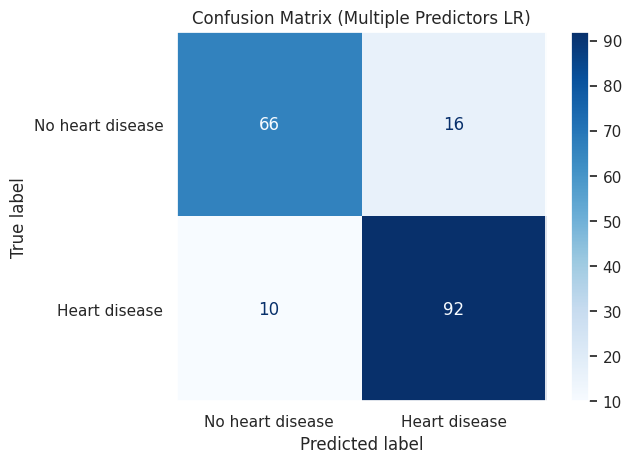

In [145]:
evaluate_model(multiple_predictor_logistic_model, X_test_multi_scaled, y_test, "Multiple Predictors LR")

- We see from the matrix that the model trained with all features as multiple predictors has the best overall metrics.

## Decision Tree
- Tune max_depth and min_samples_split

### Max_depth DT

- Build the Decision Tree Model

In [146]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [147]:
from sklearn.metrics import accuracy_score

# Create and fit the decision tree
# We'll use a max_depth of 5 for a balance between performance and interpretability
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)


--- Decision Tree (max depth = 5) Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No Heart DIsease       0.77      0.83      0.80        82
   Heart DIsease       0.85      0.80      0.83       102

        accuracy                           0.82       184
       macro avg       0.81      0.82      0.81       184
    weighted avg       0.82      0.82      0.82       184



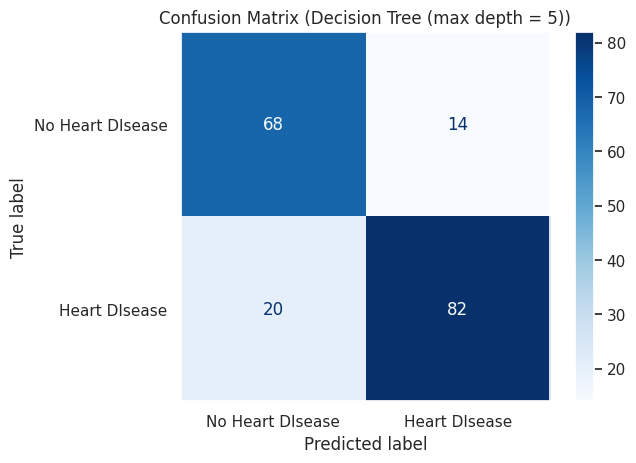

In [148]:
evaluate_model(dt_model, X_test, y_test, "Decision Tree (max depth = 5)", class_names=['No Heart DIsease', 'Heart DIsease'])

- We see that a decision tree of depth 5 has a pretty good performance, but the metrics for the logistic regression model trained with all features were a bit better

- Visualize the Decision Tree Structure

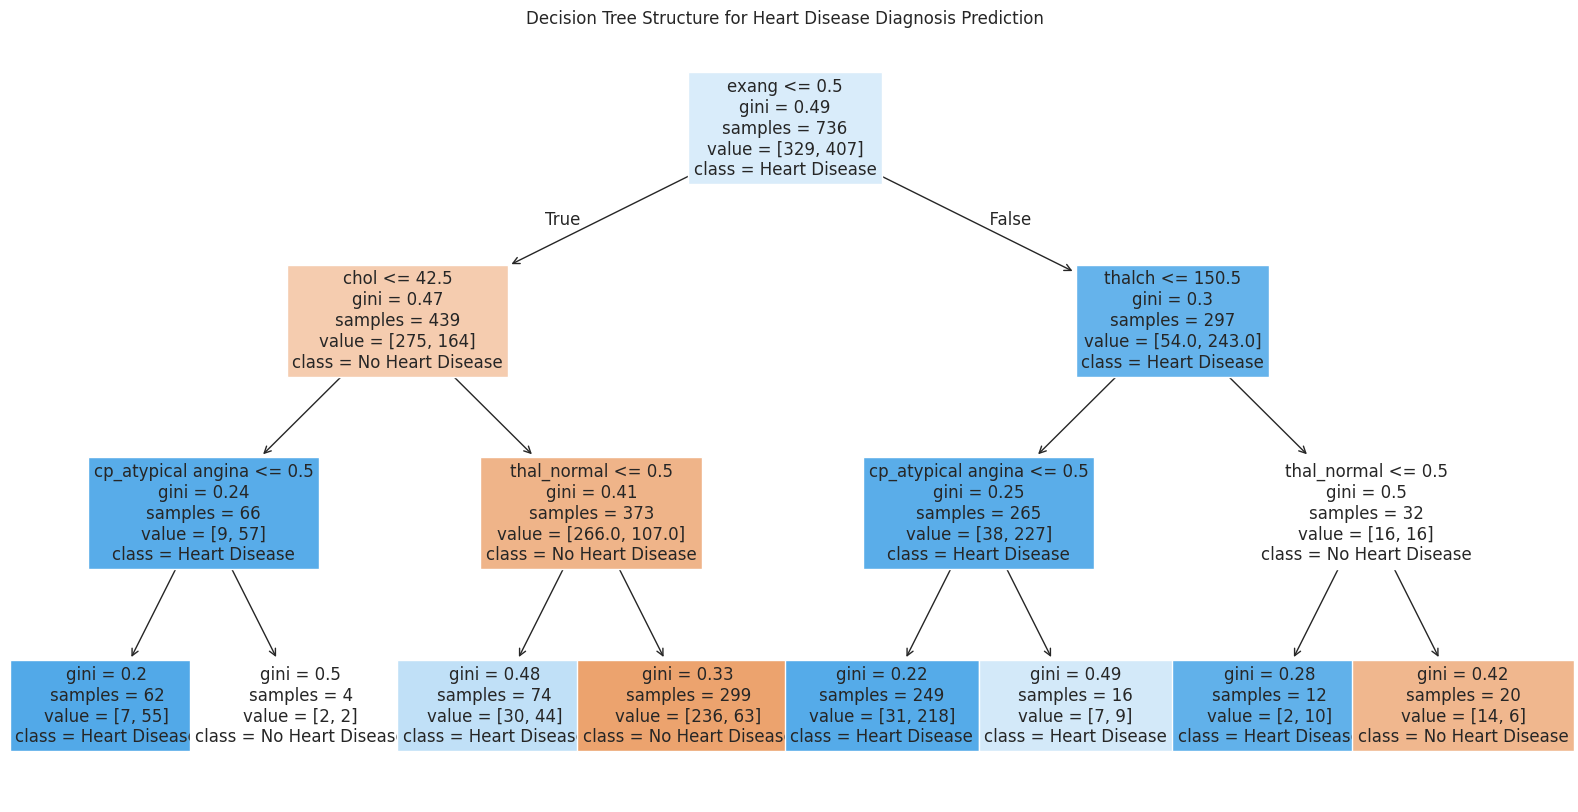

In [149]:
%matplotlib inline

dt_model = DecisionTreeClassifier(random_state=42, max_depth=3) # small depth for easier visualization
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names= X_train.columns,
          class_names=['No Heart Disease', 'Heart Disease'],
          filled=True,
          impurity=True,
          precision=2,
          fontsize=12)
plt.title("Decision Tree Structure for Heart Disease Diagnosis Prediction")
plt.show()

- Plot the decision tree noundaries for features 'oldpeak' and 'thalch'

<Figure size 1000x600 with 0 Axes>

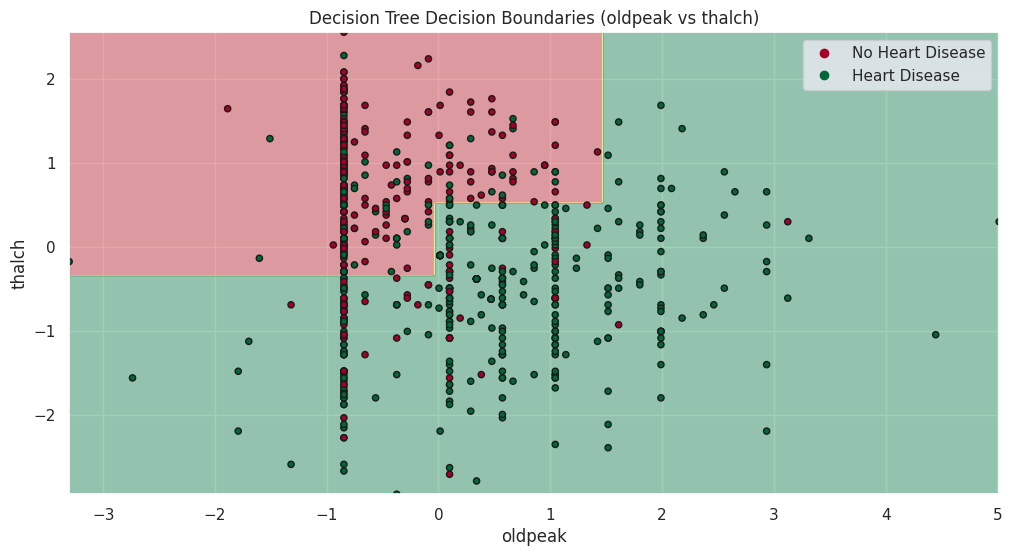

In [150]:
# Select 'oldpeak' and 'thalch' features for visualization
X_train_viz = X_train[['oldpeak', 'thalch']]
y_train_viz = y_train

# Scale the selected features
scaler_viz = StandardScaler()
X_train_viz_scaled = scaler_viz.fit_transform(X_train_viz)
X_train_viz_scaled_df = pd.DataFrame(X_train_viz_scaled, columns=['oldpeak', 'thalch'], index=X_train_viz.index)


# # Retrain a Decision Tree model with a small depth for visualization on the selected and scaled features
dt_model_viz = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model_viz.fit(X_train_viz_scaled_df, y_train_viz)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_boundaries(X_train_viz_scaled_df, y_train_viz, dt_model_viz,
                         title='Decision Tree Decision Boundaries (oldpeak vs thalch)',
                         feature_names=['oldpeak', 'thalch'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         X_scaler=None # The data is already scaled
                         )
plt.show()

### Min_samples_split DT

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a range of min_samples_split values to test
min_samples_split_values = [2, 5, 10, 20, 50, 100]

# Dictionary to store accuracy scores
accuracy_scores = {}

for min_samples_split in min_samples_split_values:
    # Create and train the decision tree model
    dt_model_split = DecisionTreeClassifier(random_state=42, min_samples_split=min_samples_split)
    dt_model_split.fit(X_train, y_train)

    # Predict on the test set
    y_pred = dt_model_split.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[min_samples_split] = accuracy

# Find the best min_samples_split value
best_min_samples_split = max(accuracy_scores, key=accuracy_scores.get)

print("Accuracy scores for different min_samples_split values:")
for split_value, score in accuracy_scores.items():
    print(f"min_samples_split: {split_value}, Accuracy: {score:.4f}")

print(f"\nBest min_samples_split: {best_min_samples_split}")


Accuracy scores for different min_samples_split values:
min_samples_split: 2, Accuracy: 0.7663
min_samples_split: 5, Accuracy: 0.7772
min_samples_split: 10, Accuracy: 0.7609
min_samples_split: 20, Accuracy: 0.7826
min_samples_split: 50, Accuracy: 0.8043
min_samples_split: 100, Accuracy: 0.8261

Best min_samples_split: 100


- Train the model with the best min_samples_split

In [152]:
best_dt_model_split = DecisionTreeClassifier(random_state=42, min_samples_split=best_min_samples_split)
best_dt_model_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=100, random_state=42)

-  Evaluate the model with the best min_samples_split


--- Decision Tree (min_samples_split = 100) Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.82      0.78      0.80        82
   Heart Disease       0.83      0.86      0.85       102

        accuracy                           0.83       184
       macro avg       0.83      0.82      0.82       184
    weighted avg       0.83      0.83      0.83       184



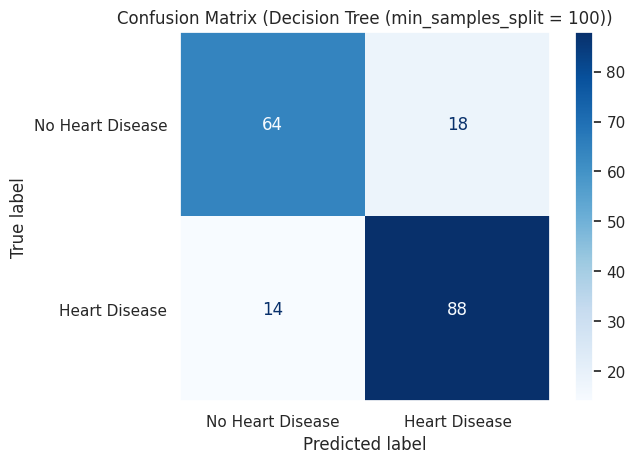

In [153]:
evaluate_model(best_dt_model_split, X_test, y_test, f"Decision Tree (min_samples_split = {best_min_samples_split})", class_names=['No Heart Disease', 'Heart Disease'])

- We see that the Min_max_split DT has a better performance than Max_depth DT with max_depth = 5

## Random Forests

- Tune n_estimators and max_depth

### Tune n_estimators RF

#### Random Forest model

- Build the Random Forest model

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
# Create and fit random forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,
    max_depth=None,        # Let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True         # Use bootstrap sampling
)

# We'll reuse the same train/test split from the decision tree
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Evaluate the Random Forest model



--- Random Forest (100 trees) Evaluation ---
Classification Report:
              precision    recall  f1-score   support

  No Default       0.85      0.80      0.82        82
     Default       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



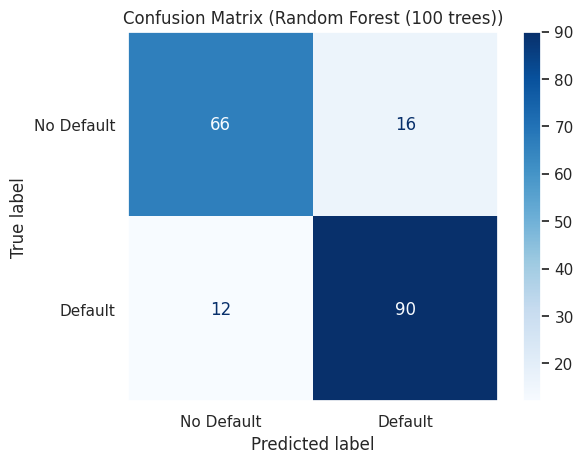

In [156]:
evaluate_model(rf_model, X_test, y_test, "Random Forest (100 trees)", class_names=['No Default', 'Default'])

- We observe that the performance of Random Forests model is pretty good, but still a bit weaker than the Logistic Regression model with all features as predictors

#### Random Forest model 3 features

- Build the Random Forest model with these 3 features only: 'exang', 'thalch', 'oldpeak'


--- Random Forest (exang, thalch, oldpeak) Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.71      0.76      0.73        82
   Heart Disease       0.79      0.75      0.77       102

        accuracy                           0.76       184
       macro avg       0.75      0.76      0.75       184
    weighted avg       0.76      0.76      0.76       184



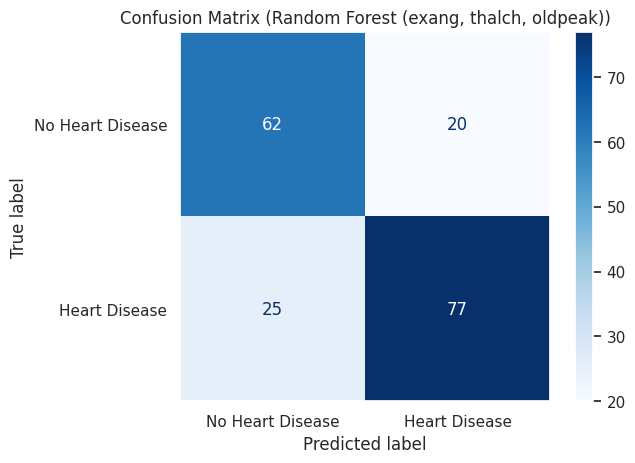

In [163]:
# Create and fit random forest with the three features we want
rf_model_3d = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

# Select the three features for training
features_to_plot = ['exang', 'thalch', 'oldpeak']
X_train_3d = X_train[features_to_plot]
X_test_3d = X_test[features_to_plot]

# Train the model with these three features
rf_model_3d.fit(X_train_3d, y_train)

# Evaluate the 3D model
evaluate_model(rf_model_3d, X_test_3d, y_test, "Random Forest (exang, thalch, oldpeak)",
               class_names=['No Heart Disease', 'Heart Disease'])


- Visualize Random Forest decision boundaries

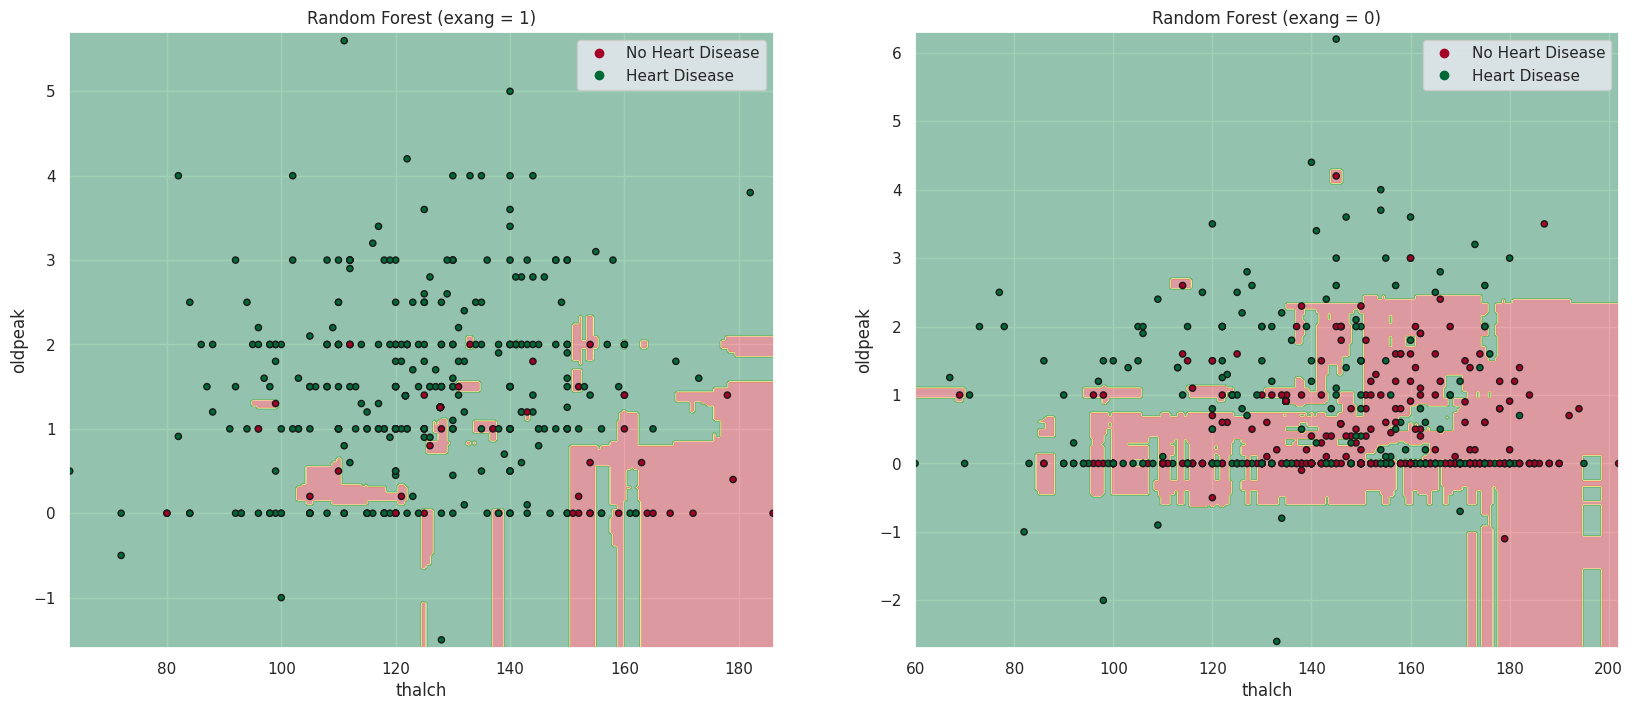

In [162]:
# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Filter data and select all three features (the function will use exang as control)
X_students = X[X['exang'] == 1][features_to_plot]
y_students = y[X['exang'] == 1]
plot_decision_boundaries(X_students, y_students, rf_model_3d, "Random Forest (exang = 1)",
                         feature_names=['thalch', 'oldpeak'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         control_column='exang', control_value=1,
                         ax=axes[0], x1_padding=0.1, x2_padding=0.1)

X_non_students = X[X['exang'] == 0][features_to_plot]
y_non_students = y[X['exang'] == 0]
plot_decision_boundaries(X_non_students, y_non_students, rf_model_3d, "Random Forest (exang = 0)",
                         feature_names=['thalch', 'oldpeak'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         control_column='exang', control_value=0,
                         ax=axes[1], x1_padding=0.1, x2_padding=0.1)

plt.show()

### Max_depth RF

#### Random Forest model

- Build the Random Forest model with a max_depth of 5

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
# Create and fit random forest
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42,
    max_depth=5,        # Let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True         # Use bootstrap sampling
)

# We'll reuse the same train/test split from the decision tree
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

- Evaluate the Random Forest model



--- Random Forest (100 trees) Evaluation ---
Classification Report:
              precision    recall  f1-score   support

  No Default       0.87      0.74      0.80        82
     Default       0.82      0.91      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



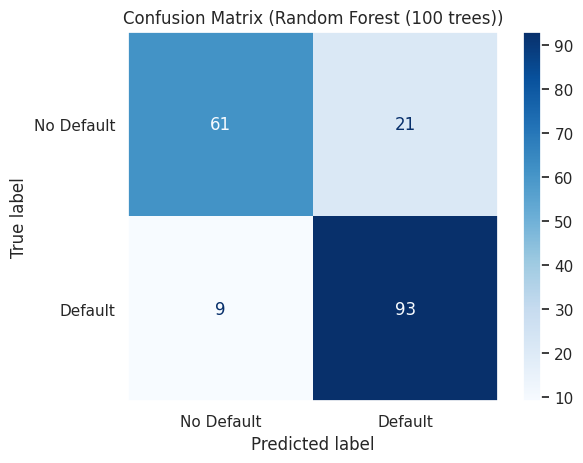

In [169]:
evaluate_model(rf_model, X_test, y_test, "Random Forest (100 trees)", class_names=['No Default', 'Default'])

- We observe that the performance of Random Forest model with a max depth of 5 is weaker than when the trees are allowed to grow fully.

#### Random Forest model 3 features

- Build the Random Forest model with these 3 features only: 'exang', 'thalch', 'oldpeak' with a max_depth of 5


--- Random Forest (exang, thalch, oldpeak) Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.69      0.78      0.73        82
   Heart Disease       0.80      0.72      0.76       102

        accuracy                           0.74       184
       macro avg       0.75      0.75      0.74       184
    weighted avg       0.75      0.74      0.75       184



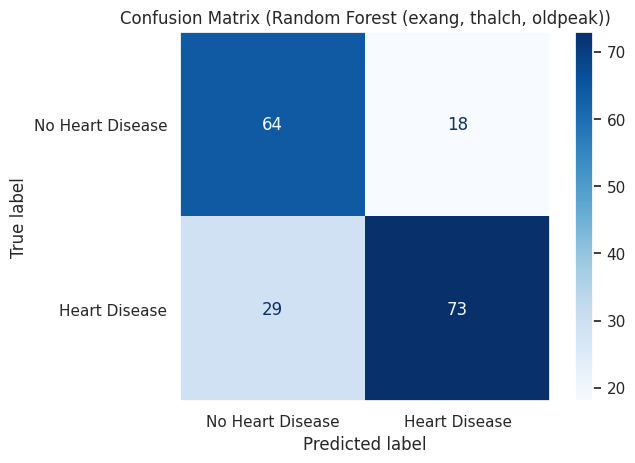

In [164]:
# Create and fit random forest with the three features we want
rf_model_3d = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

# Select the three features for training
features_to_plot = ['exang', 'thalch', 'oldpeak']
X_train_3d = X_train[features_to_plot]
X_test_3d = X_test[features_to_plot]

# Train the model with these three features
rf_model_3d.fit(X_train_3d, y_train)

# Evaluate the 3D model
evaluate_model(rf_model_3d, X_test_3d, y_test, "Random Forest (exang, thalch, oldpeak)",
               class_names=['No Heart Disease', 'Heart Disease'])


- Visualize Random Forest decision boundaries

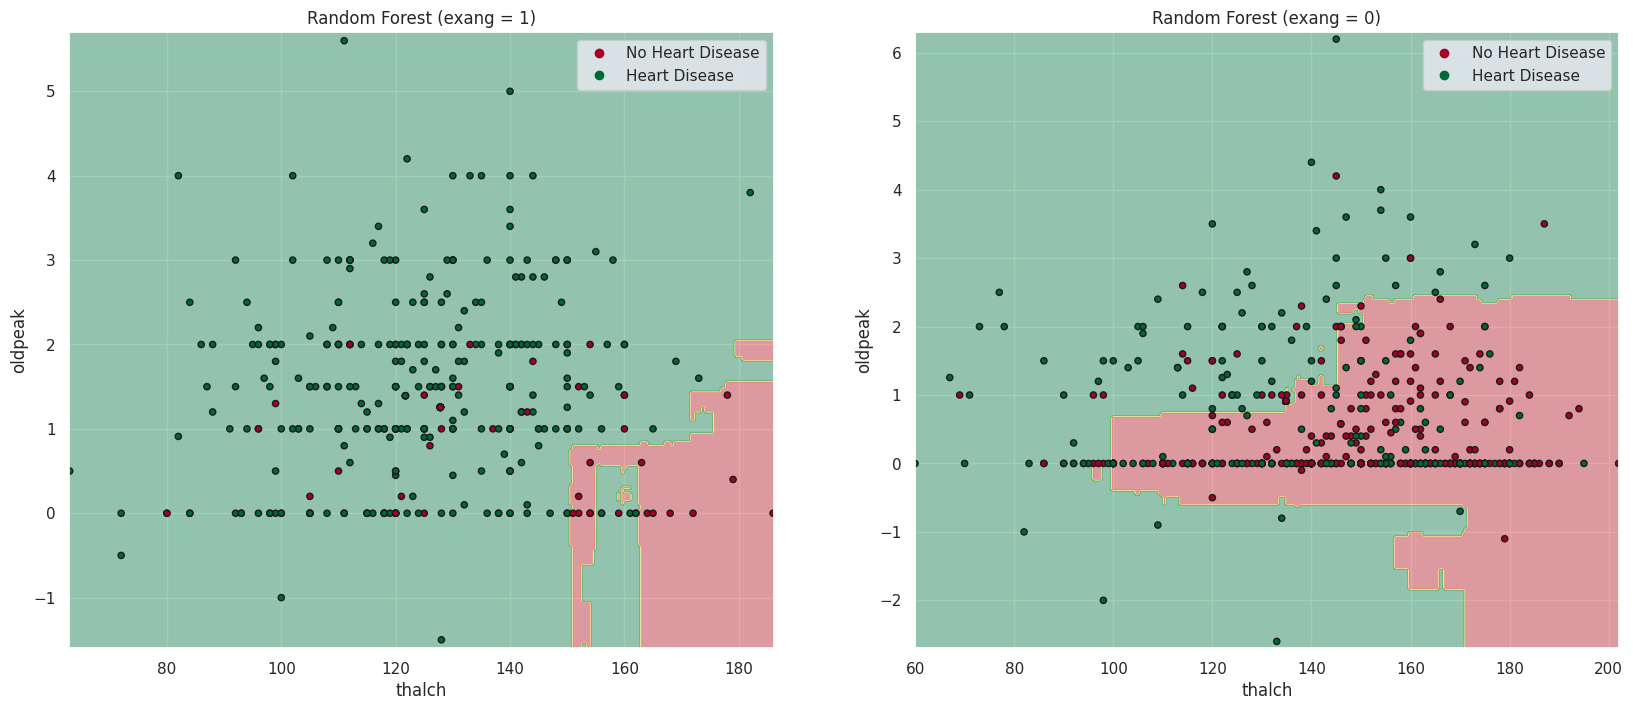

In [165]:
# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Filter data and select all three features (the function will use exang as control)
X_students = X[X['exang'] == 1][features_to_plot]
y_students = y[X['exang'] == 1]
plot_decision_boundaries(X_students, y_students, rf_model_3d, "Random Forest (exang = 1)",
                         feature_names=['thalch', 'oldpeak'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         control_column='exang', control_value=1,
                         ax=axes[0], x1_padding=0.1, x2_padding=0.1)

X_non_students = X[X['exang'] == 0][features_to_plot]
y_non_students = y[X['exang'] == 0]
plot_decision_boundaries(X_non_students, y_non_students, rf_model_3d, "Random Forest (exang = 0)",
                         feature_names=['thalch', 'oldpeak'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         control_column='exang', control_value=0,
                         ax=axes[1], x1_padding=0.1, x2_padding=0.1)

plt.show()

- We observe from the decision boundaries and performance metrics that a random forest model with a limited depth has a worse performance than when the trees are allowed to grow fully.

## Support Vector Machines (SVMs)

- Try both linear and RBF kernels, tune C

### RBF Kernels

- Build a SVM with all features and examine its performance metrics

In [170]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SVMs are sensitive to feature scales, so we'll standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We'll use the RBF kernel, which is a good default
svm_model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)


--- SVM (RBF) Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No heart disease       0.88      0.79      0.83        82
   Heart disease       0.85      0.91      0.88       102

        accuracy                           0.86       184
       macro avg       0.86      0.85      0.86       184
    weighted avg       0.86      0.86      0.86       184



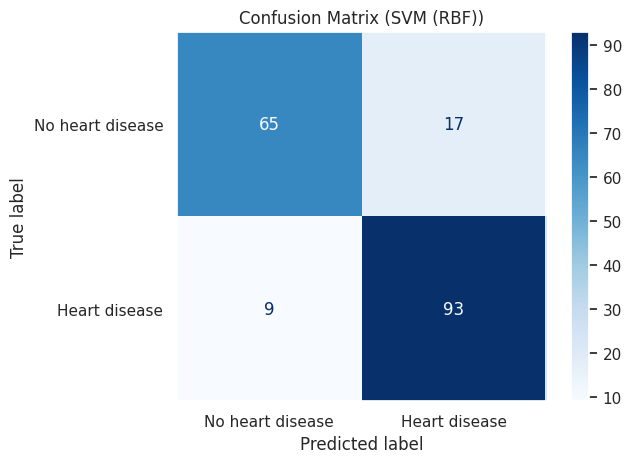

In [171]:
evaluate_model(svm_model, X_test_scaled, y_test, "SVM (RBF)")

- We observe that the performance of an SVM is the best we have seen so far

- Build a SVM with only 3 features to be able to see its decision boundaries

In [188]:
# Select the three features for training
features_to_plot = ['exang', 'thalch', 'oldpeak']
X_train_3d = X_train[features_to_plot]
X_test_3d = X_test[features_to_plot]


# Use pandas-compatible scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_3d),
    columns=X_train_3d.columns,
    index=X_train_3d.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_3d),
    columns=X_test_3d.columns,
    index=X_test_3d.index
)

# We'll use the RBF kernel, which is a good default
svm_model_3d = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
svm_model_3d.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)


--- SVM (RBF) Evaluation ---
Classification Report:
                  precision    recall  f1-score   support

No heart disease       0.68      0.76      0.72        82
   Heart disease       0.78      0.72      0.75       102

        accuracy                           0.73       184
       macro avg       0.73      0.74      0.73       184
    weighted avg       0.74      0.73      0.73       184



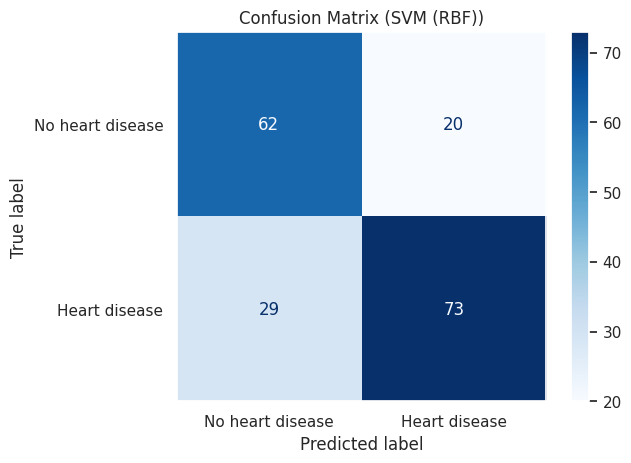

In [189]:
evaluate_model(svm_model_3d, X_test_scaled, y_test, "SVM (RBF)")

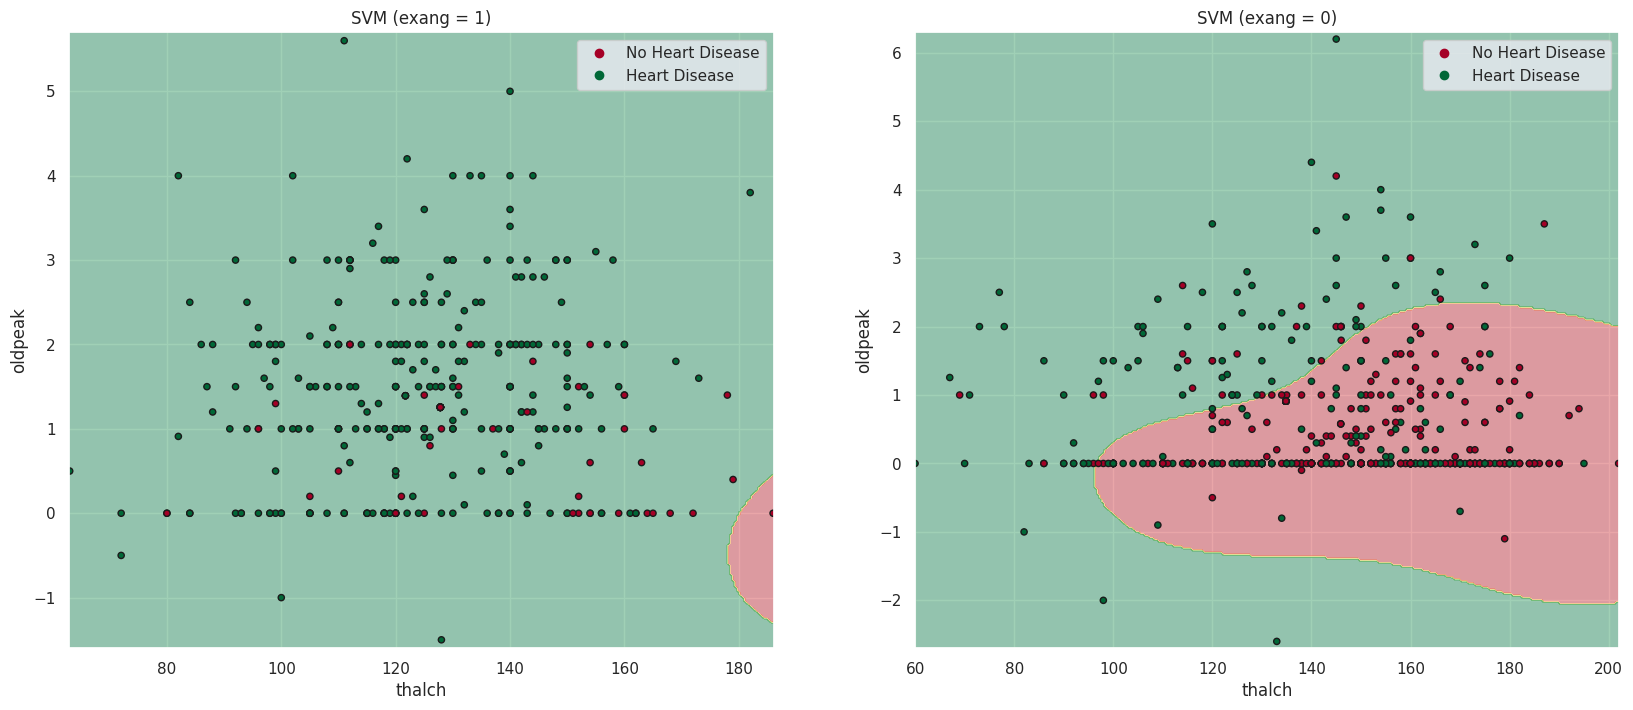

In [190]:
# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Filter data and select all three features (the function will use exang as control)
X_students = X[X['exang'] == 1][features_to_plot]
y_students = y[X['exang'] == 1]
plot_decision_boundaries(X_students, y_students, svm_model_3d, "SVM (exang = 1)",
                         feature_names=['thalch', 'oldpeak'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         control_column='exang', control_value=1,
                         ax=axes[0], X_scaler=scaler, x1_padding=0.1, x2_padding=0.1)

X_non_students = X[X['exang'] == 0][features_to_plot]
y_non_students = y[X['exang'] == 0]
plot_decision_boundaries(X_non_students, y_non_students, svm_model_3d, "SVM (exang = 0)",
                         feature_names=['thalch', 'oldpeak'],
                         class_names=['No Heart Disease', 'Heart Disease'],
                         control_column='exang', control_value=0,
                         ax=axes[1], X_scaler=scaler, x1_padding=0.1, x2_padding=0.1)

plt.show()

### Plot decision boundaries of SVMs with Linear, Poly, RBF and Sigmoid kernels

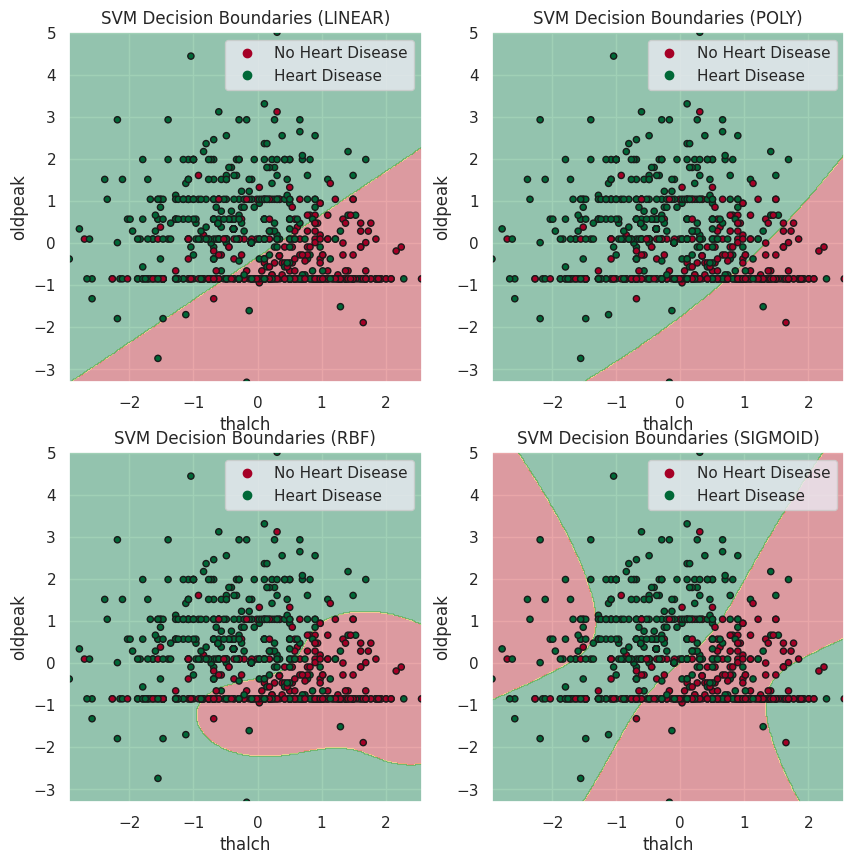

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
    ax = axes[i // 2, i % 2]

    # Train on only 2 features instead of using 'exang' as the control column
    X_train_2d = X_train_scaled[['thalch', 'oldpeak']]

    multi_svm_model = SVC(kernel=kernel, C=1.0, random_state=1, probability=True)
    multi_svm_model.fit(X_train_2d, y_train)

    # Plot the decision boundaries
    plot_decision_boundaries(X_train_2d, y_train, multi_svm_model,
                           f"SVM Decision Boundaries ({kernel.upper()})",
                           feature_names=['thalch', 'oldpeak'],
                           class_names=['No Heart Disease', 'Heart Disease'],
                           ax=ax)

plt.show()

- From the plots we can see that the RBF kernel has the best performance and boundary.